# INSTALLING DEPENDENCIES

In [ ]:
!pip install statsforecast utilsforecast

# IMPORTING LIBRARIES

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Reading the Dataset

In [2]:
df= pd.read_csv("FinalDataset.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,CULPABLE HOMICIDE,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,...,CHEATING,DOWRY DEATHS,ASSAULT ON WOMEN,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,ANDHRA PRADESH,TOTAL,2001,2602,136,871,1182,214,629,7220,...,5391.0,420,3544,2271,5791,NaN,NaN,NaN,NaN,NaN
1,ARUNACHAL PRADESH,TOTAL,2001,83,3,33,83,22,84,248,...,30.0,0,78,3,11,NaN,NaN,NaN,NaN,NaN
2,ASSAM,TOTAL,2001,1356,40,817,1480,532,687,2423,...,575.0,59,850,4,1248,NaN,NaN,NaN,NaN,NaN
3,BIHAR,TOTAL,2001,3643,250,888,2159,1291,2203,3233,...,1659.0,859,562,21,1558,NaN,NaN,NaN,NaN,NaN
4,CHHATTISGARH,TOTAL,2001,880,45,959,207,87,338,4144,...,402.0,70,1763,161,840,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,D & N HAVELI,TOTAL,2022,6,1,1,22,0,4,14,...,20.0,0,7,0,3,NaN,NaN,NaN,NaN,NaN
766,DAMAN & DIU,TOTAL,2022,509,90,1212,5388,18,1808,6189,...,2782.0,0,4,0,7,NaN,NaN,NaN,NaN,NaN
767,DELHI,TOTAL,2022,99,25,287,895,4,84,1678,...,351.0,131,2017,387,4901,NaN,NaN,NaN,NaN,NaN
768,LAKSHADWEEP,TOTAL,2022,0,0,4,0,0,0,0,...,0.0,0,1,0,3,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   STATE/UT                             770 non-null    object 
 1   DISTRICT                             770 non-null    object 
 2   YEAR                                 770 non-null    int64  
 3   MURDER                               770 non-null    int64  
 4   CULPABLE HOMICIDE                    770 non-null    int64  
 5   RAPE                                 770 non-null    int64  
 6   KIDNAPPING & ABDUCTION               770 non-null    int64  
 7   DACOITY                              770 non-null    int64  
 8   ROBBERY                              770 non-null    int64  
 9   BURGLARY                             770 non-null    int64  
 10  THEFT                                770 non-null    int64  
 11  RIOTS                           

# Information on the Dataset

#### 1) In this section, the dataset used has been collected from India Data Portal and the Open Government Data Platform India

#### 2) The data provides information on the number of Crimes commited in 28 Indian states and 7 Union Territories during the year 2001 to 2022 (only available)

#### 3) It contains the records of 10 Different category of Crime committed namely:
#### Murder
#### Culpable Homicide
#### Kidnapping and Abduction
#### Rape
#### Dacoity
#### Robbery
#### Burglary
#### Theft
#### Riots
#### Criminal Breach of Trust
#### Cheating
#### Dowry Death
#### Assault on Women
#### Insult to Modesty of Women
#### Cruelty By Husband or his relatives

# Data Cleaning. Removing unwanted columns from the DataFrame

In [9]:
# Dropping the DISTRICT column and unnamed columns
df = df.drop(columns=['DISTRICT', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])

# Saving the cleaned dataset
df.to_csv("Final_Dataset_Cleaned.csv", index=False)

print("Columns removed successfully.")
print(df)
df.info()

              STATE/UT  YEAR  MURDER  CULPABLE HOMICIDE  RAPE  \
0       ANDHRA PRADESH  2001    2602                136   871   
1    ARUNACHAL PRADESH  2001      83                  3    33   
2                ASSAM  2001    1356                 40   817   
3                BIHAR  2001    3643                250   888   
4         CHHATTISGARH  2001     880                 45   959   
..                 ...   ...     ...                ...   ...   
765       D & N HAVELI  2022       6                  1     1   
766        DAMAN & DIU  2022     509                 90  1212   
767              DELHI  2022      99                 25   287   
768        LAKSHADWEEP  2022       0                  0     4   
769         PUDUCHERRY  2022      30                  1     9   

     KIDNAPPING & ABDUCTION  DACOITY  ROBBERY  BURGLARY   THEFT  RIOTS  \
0                      1182      214      629      7220   16751   3001   
1                        83       22       84       248     443     24 

# Data Visualisation

#### Plotting the graph for number of cases per state for each crime Head

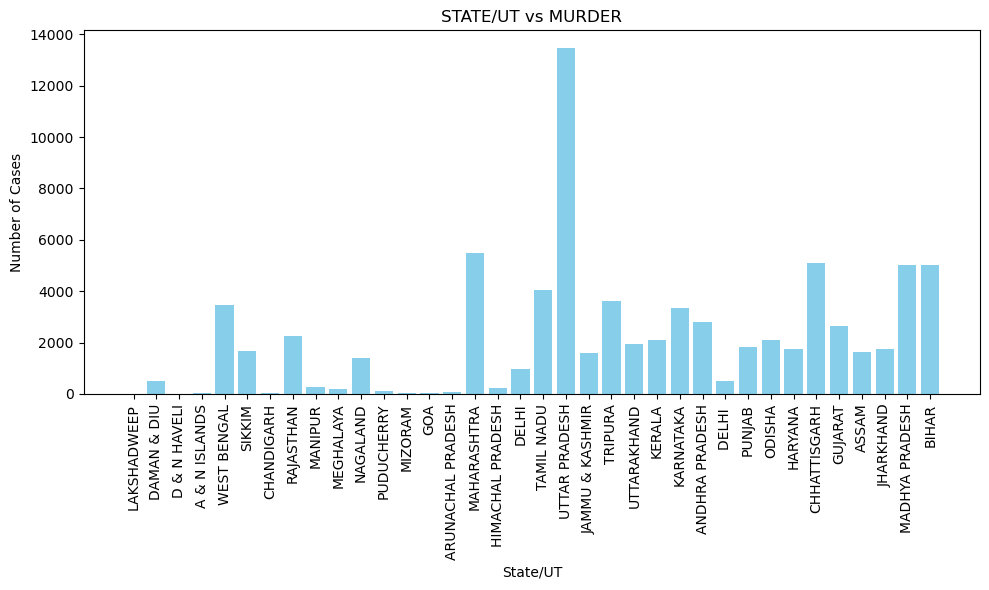

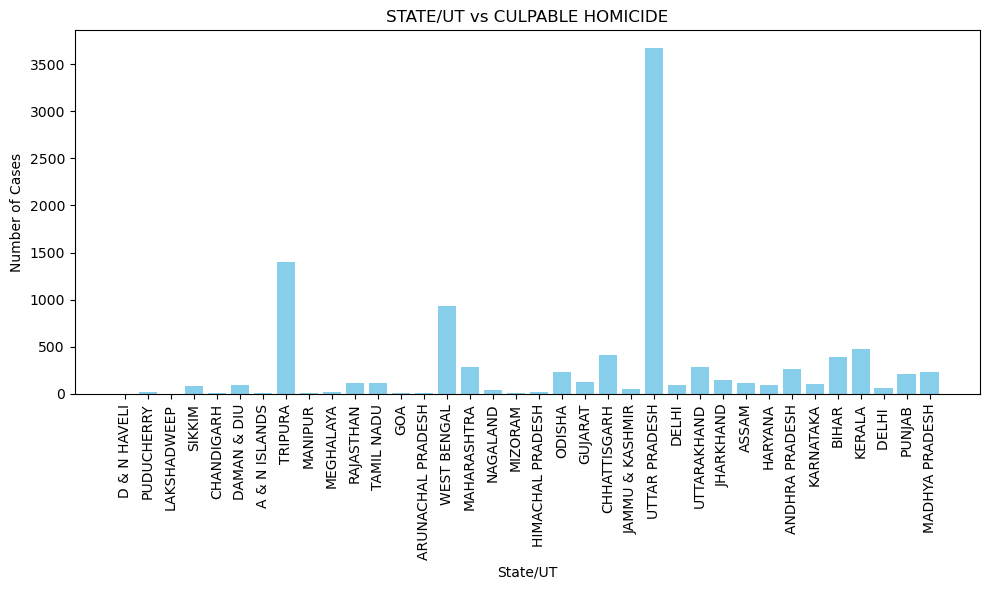

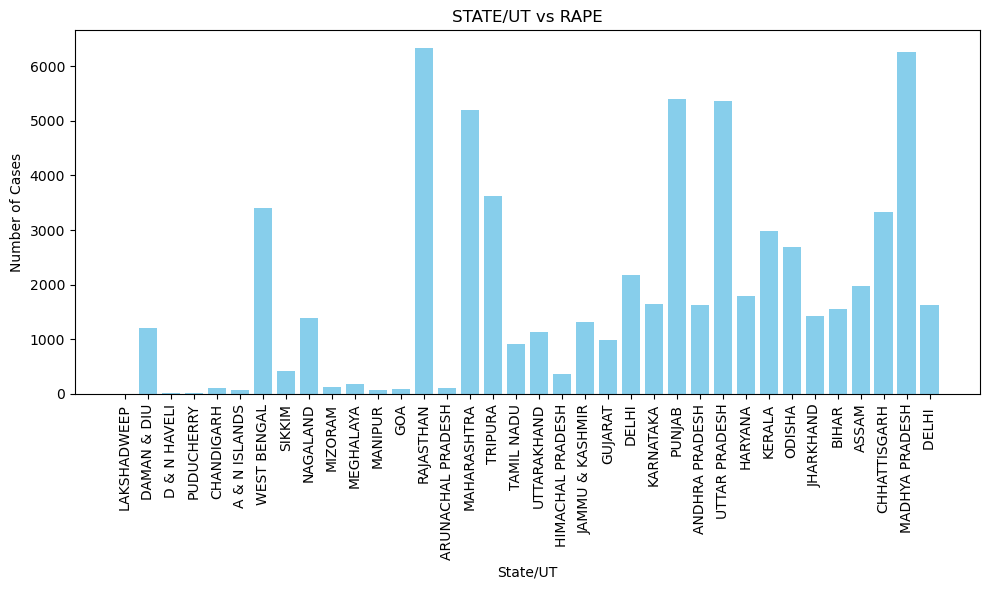

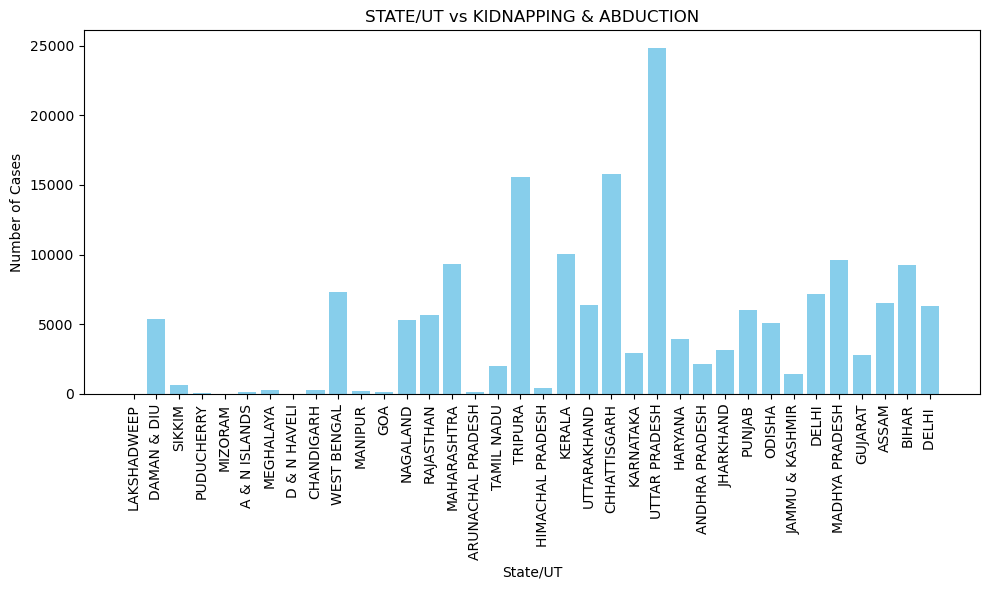

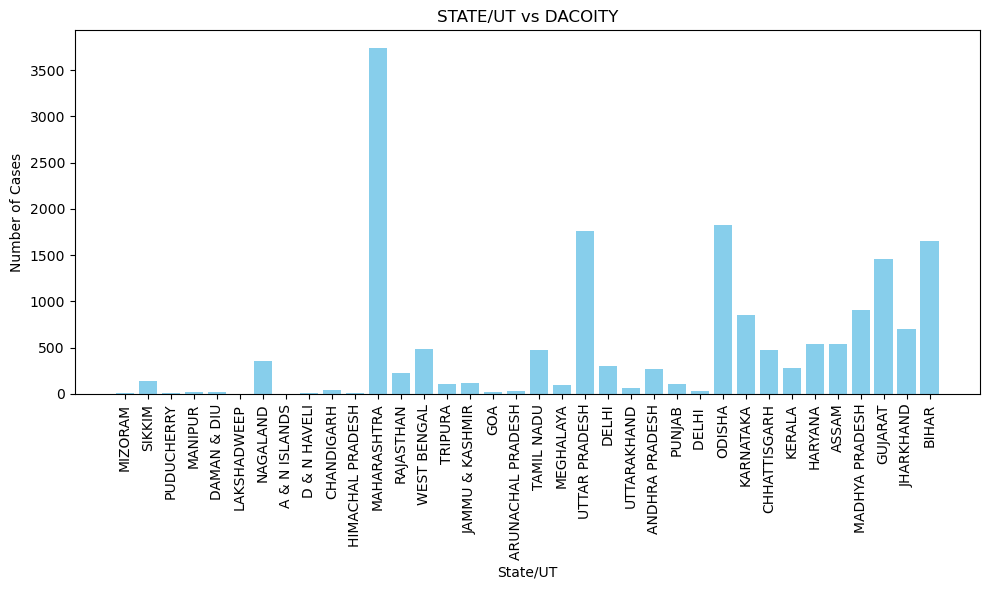

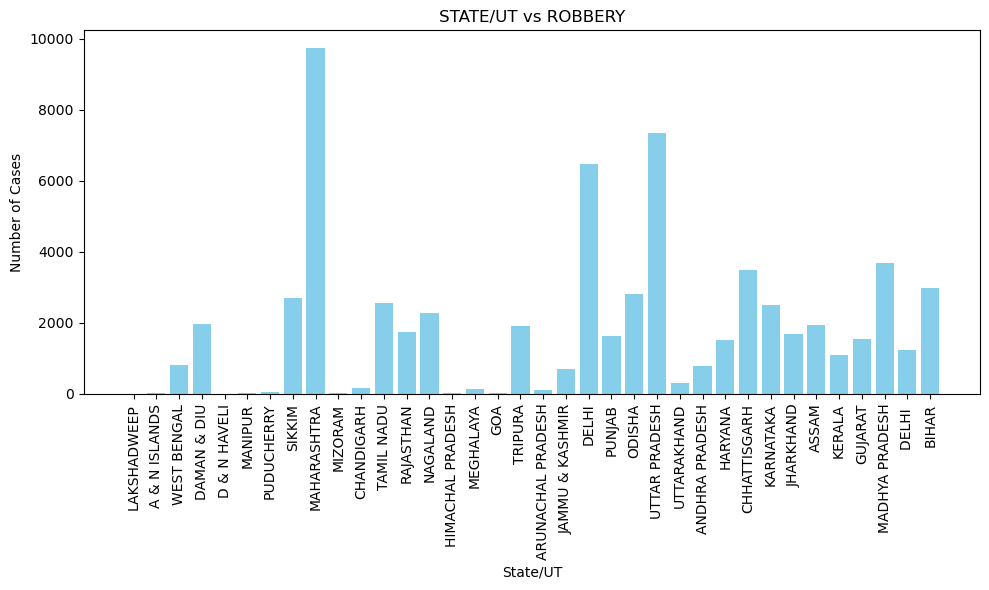

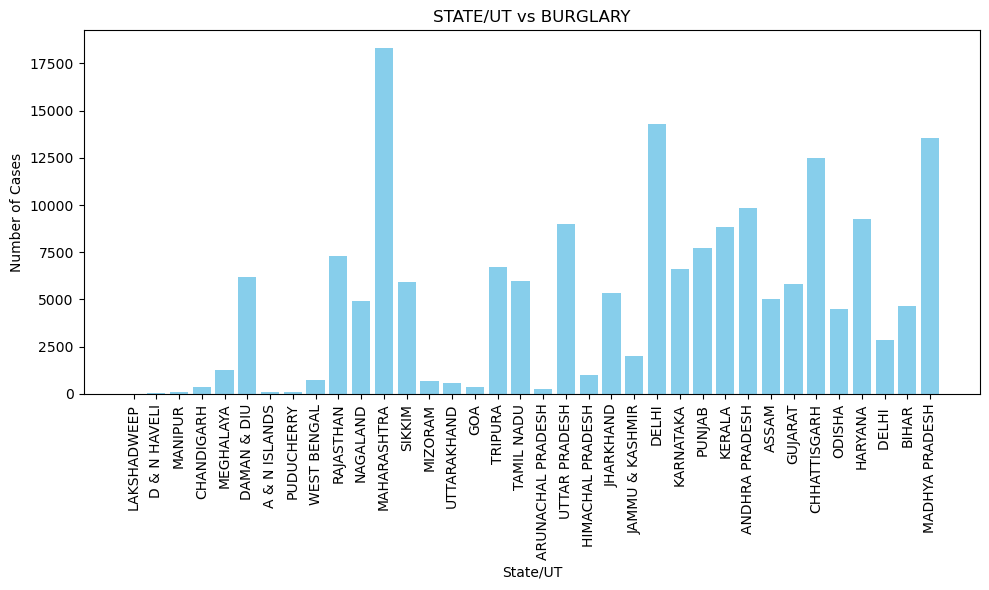

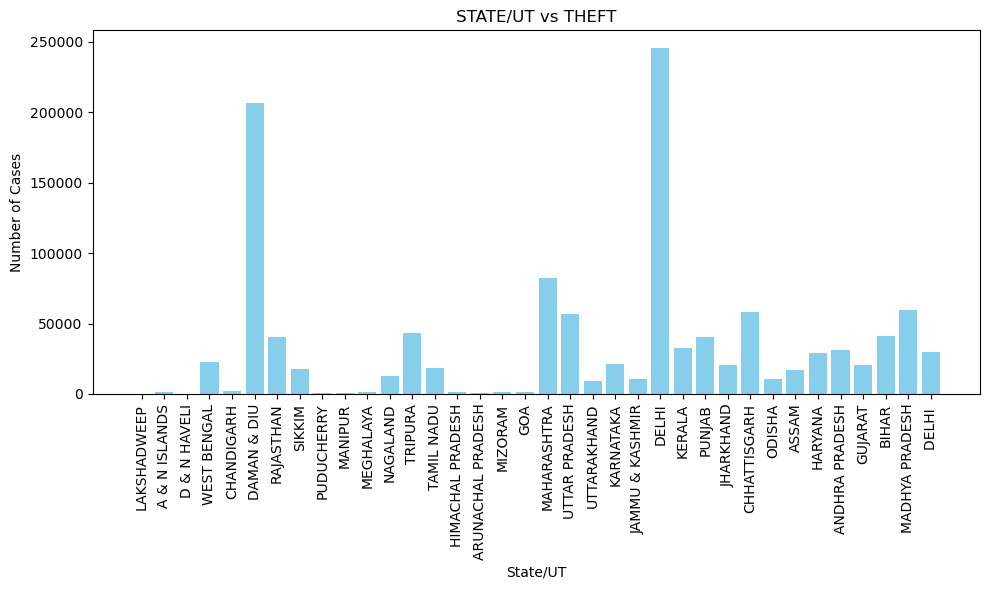

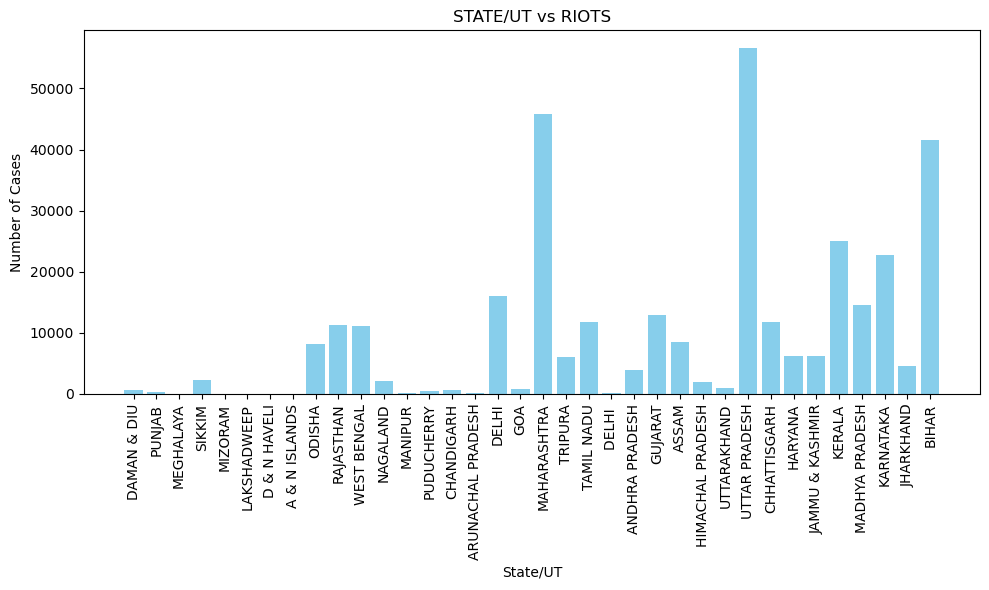

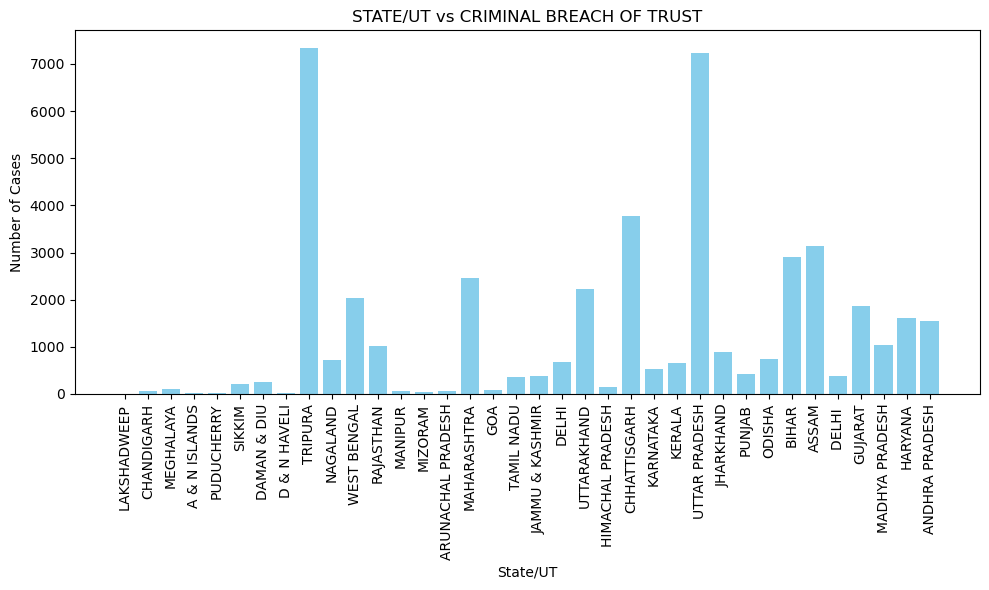

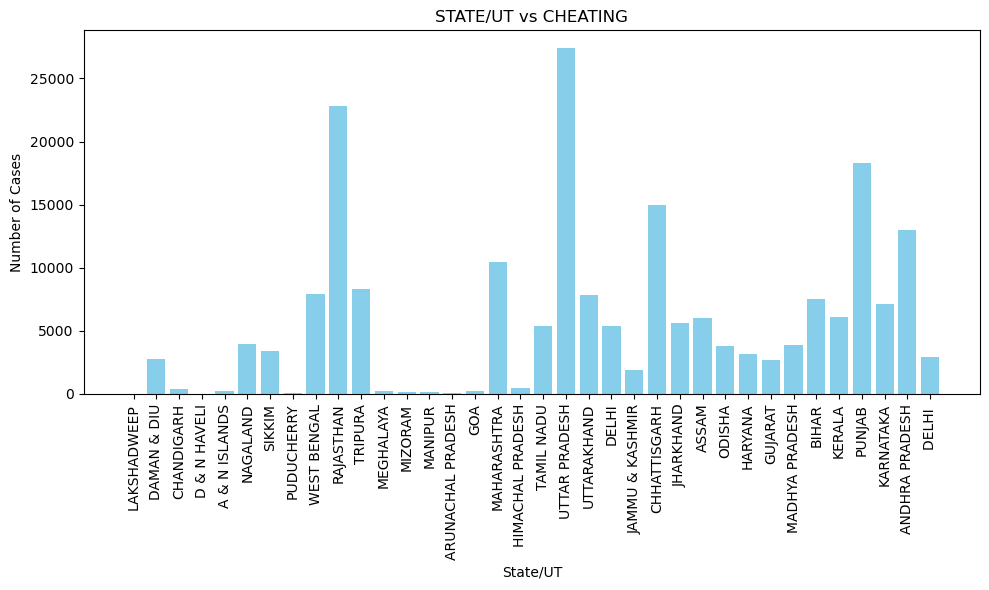

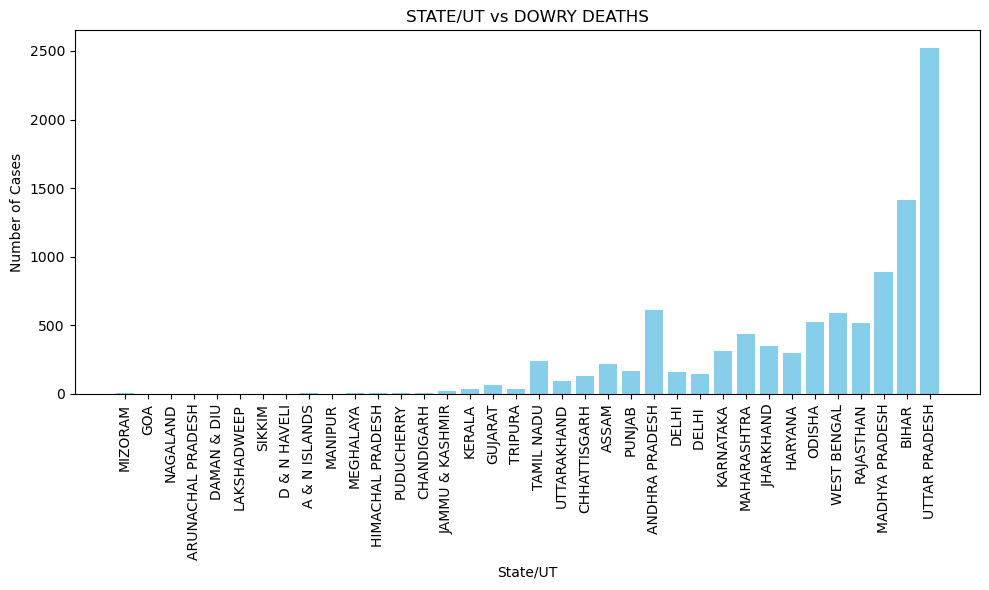

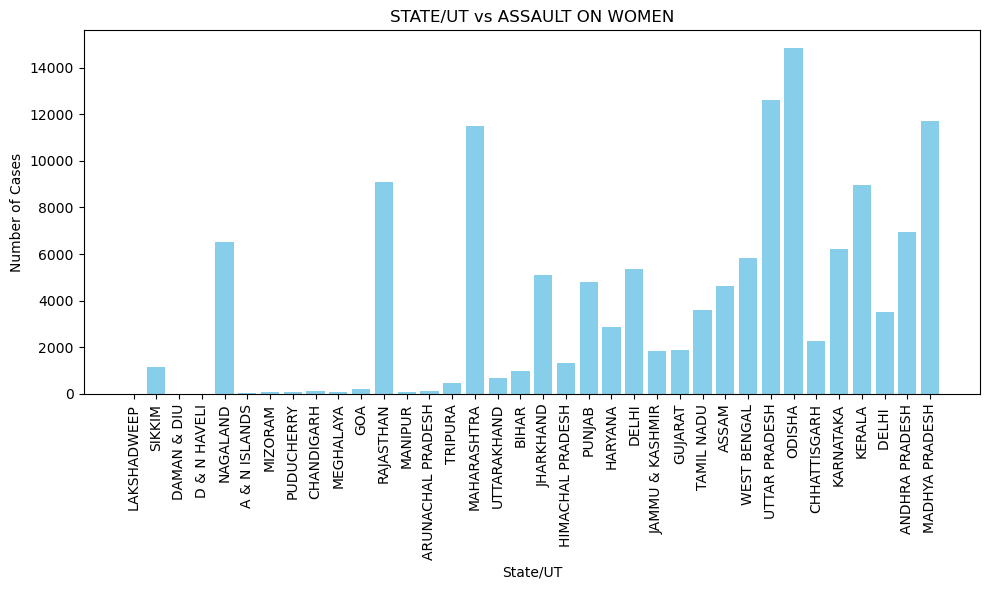

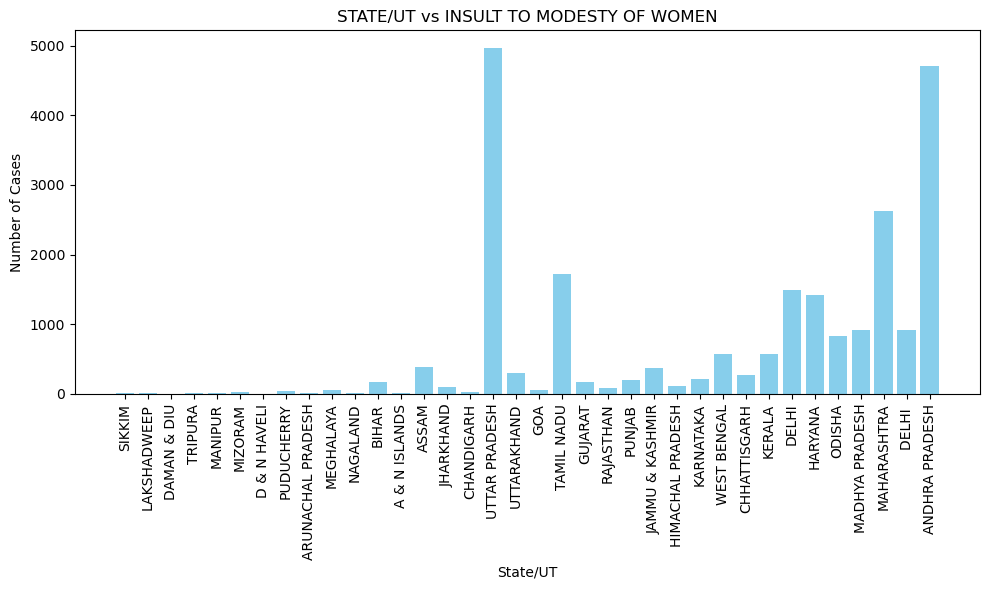

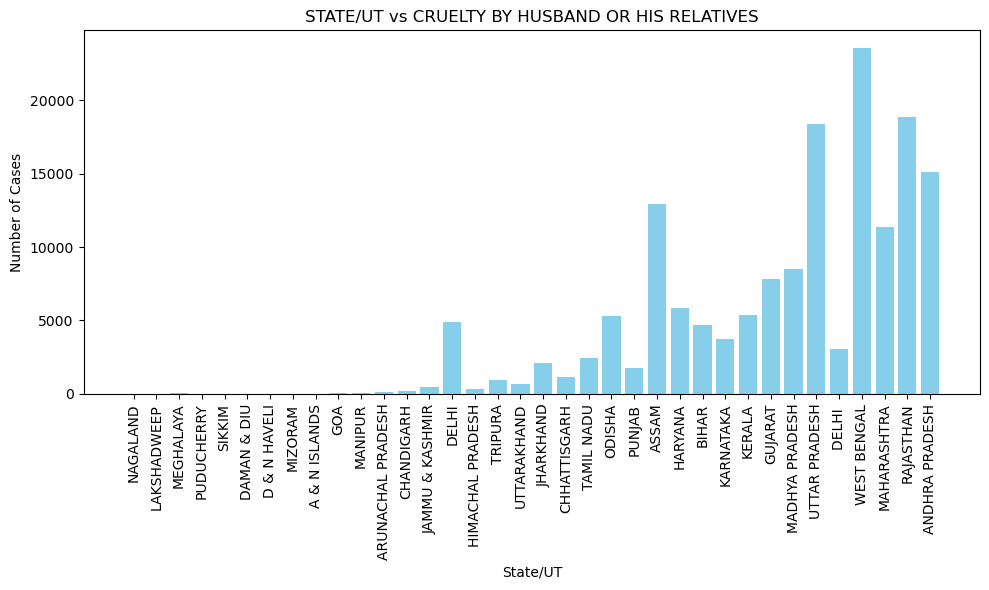

In [12]:
# Identifying state column and crime heads
state_col = df.columns[0]  # First column assumed to be STATE/UT
crime_heads = df.columns[2:]  # All other columns are crime heads

# Plotting for each crime head
for crime in crime_heads:
    plt.figure(figsize=(10, 6))
    df_sorted = df.sort_values(by=crime)
    plt.bar(df_sorted[state_col], df_sorted[crime], color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel("State/UT")
    plt.ylabel("Number of Cases")
    plt.title(f"{state_col} vs {crime}")
    plt.tight_layout()
    plt.show()

# Creation of New Dataset

In [13]:
#First sorting the dataframe such that states are together
df= df.sort_values(by=["STATE/UT","YEAR"], ascending=[True, True]).reset_index(drop=True)

In [14]:
df

,STATE/UT,YEAR,MURDER,CULPABLE HOMICIDE,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,DOWRY DEATHS,ASSAULT ON WOMEN,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES
0,A & N ISLANDS,2001,13,0,3,2,0,4,64,65,13,10,8.0,0,19,1,9
1,A & N ISLANDS,2002,17,1,2,2,1,7,49,49,11,4,11.0,0,17,3,4
2,A & N ISLANDS,2003,21,1,2,2,2,7,56,60,19,3,13.0,0,9,2,7
3,A & N ISLANDS,2004,15,2,10,3,0,3,69,103,9,0,12.0,0,6,3,5
4,A & N ISLANDS,2005,14,3,4,2,0,4,68,92,4,8,13.0,0,11,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,WEST BENGAL,2018,1933,367,1069,4057,56,291,217,13665,1728,1539,6808.0,444,3399,391,16951
766,WEST BENGAL,2019,1933,367,1069,4057,56,291,217,13665,1728,1539,6808.0,444,3399,391,16951
767,WEST BENGAL,2020,5,1,2,6,1,0,24,25,1,3,15.0,522,2488,446,19962
768,WEST BENGAL,2021,1884,246,1123,5512,51,318,90,9232,776,1764,7939.0,454,2485,424,19952


In [15]:
new_df= pd.DataFrame(columns=['YEAR', 'STATE/UT','Number of Cases','Crime Head'])
for i in range(2,17):
    temp_df= df[['YEAR','STATE/UT']].copy()
    temp_df['Number of Cases']= df[df.columns[i]]
    temp_df['Crime Head']= df.columns[i]

    new_df= pd.concat([new_df, temp_df])

In [16]:
new_df

,YEAR,STATE/UT,Number of Cases,Crime Head
0,2001,A & N ISLANDS,13,MURDER
1,2002,A & N ISLANDS,17,MURDER
2,2003,A & N ISLANDS,21,MURDER
3,2004,A & N ISLANDS,15,MURDER
4,2005,A & N ISLANDS,14,MURDER
...,...,...,...,...
765,2018,WEST BENGAL,16951,CRUELTY BY HUSBAND OR HIS RELATIVES
766,2019,WEST BENGAL,16951,CRUELTY BY HUSBAND OR HIS RELATIVES
767,2020,WEST BENGAL,19962,CRUELTY BY HUSBAND OR HIS RELATIVES
768,2021,WEST BENGAL,19952,CRUELTY BY HUSBAND OR HIS RELATIVES


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       11550 non-null  int64  
 1   YEAR             11550 non-null  int64  
 2   STATE/UT         11550 non-null  object 
 3   Number of Cases  11549 non-null  float64
 4   Crime Head       11550 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 451.3+ KB


### We find that there is a null value in the Number of Cases column
### The next step is to find and isolate the row where the null value is found exactly

In [31]:
new_df[new_df['Number of Cases'].isnull()]

,Unnamed: 0,YEAR,STATE/UT,Number of Cases,Crime Head
7917,7917,2021,DELHI,NaN,CHEATING


In [32]:
new_df= new_df.drop(columns=['Unnamed: 0'])

In [33]:
new_df

,YEAR,STATE/UT,Number of Cases,Crime Head
0,2001,A & N ISLANDS,13.0,MURDER
1,2002,A & N ISLANDS,17.0,MURDER
2,2003,A & N ISLANDS,21.0,MURDER
3,2004,A & N ISLANDS,15.0,MURDER
4,2005,A & N ISLANDS,14.0,MURDER
...,...,...,...,...
11545,2018,WEST BENGAL,16951.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11546,2019,WEST BENGAL,16951.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11547,2020,WEST BENGAL,19962.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11548,2021,WEST BENGAL,19952.0,CRUELTY BY HUSBAND OR HIS RELATIVES


### Fixing the missing value

In [35]:
#Fixing the missing value
mean_val = new_df[(new_df['STATE/UT'].str.upper() == 'DELHI') & 
              (new_df['Crime Head'].str.upper() == 'CHEATING')]['Number of Cases'].mean()

#Replacing the NaN with this mean
new_df.loc[(new_df['YEAR'] == 2021) & 
       (new_df['STATE/UT'].str.upper() == 'DELHI') & 
       (new_df['Crime Head'].str.upper() == 'CHEATING'), 'Number of Cases'] = mean_val
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             11550 non-null  int64  
 1   STATE/UT         11550 non-null  object 
 2   Number of Cases  11550 non-null  float64
 3   Crime Head       11550 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 361.1+ KB


In [36]:
#Saving the cleaned dataset back to CSV
new_df.to_csv("New_Final_Dataset.csv", index=False)

print("Missing value fixed and 'Unnamed: 0' dropped.")

Missing value fixed and 'Unnamed: 0' dropped.


# Loading the New Dataset

In [373]:
new_df= pd.read_csv('New_Final_Dataset.csv')
new_df           

,YEAR,STATE/UT,Number of Cases,Crime Head
0,2001,A & N ISLANDS,13.0,MURDER
1,2002,A & N ISLANDS,17.0,MURDER
2,2003,A & N ISLANDS,21.0,MURDER
3,2004,A & N ISLANDS,15.0,MURDER
4,2005,A & N ISLANDS,14.0,MURDER
...,...,...,...,...
11545,2018,WEST BENGAL,16951.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11546,2019,WEST BENGAL,16951.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11547,2020,WEST BENGAL,19962.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11548,2021,WEST BENGAL,19952.0,CRUELTY BY HUSBAND OR HIS RELATIVES


In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             11550 non-null  int64  
 1   STATE/UT         11550 non-null  object 
 2   Number of Cases  11550 non-null  float64
 3   Crime Head       11550 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 361.1+ KB


In [39]:
new_df.describe()

,YEAR,Number of Cases
count,11550.000000,11550.000000
mean,2011.500000,1799.860593
std,6.344563,6526.814059
min,2001.000000,0.000000
25%,2006.000000,20.000000
50%,2011.500000,188.000000
75%,2017.000000,1378.750000
max,2022.000000,245985.000000


### We can see that the data is clean with no null values

# Visualization using this new Dataset

### Finding and plotting the top 5 crime heads in the entire dataset by number of Cases

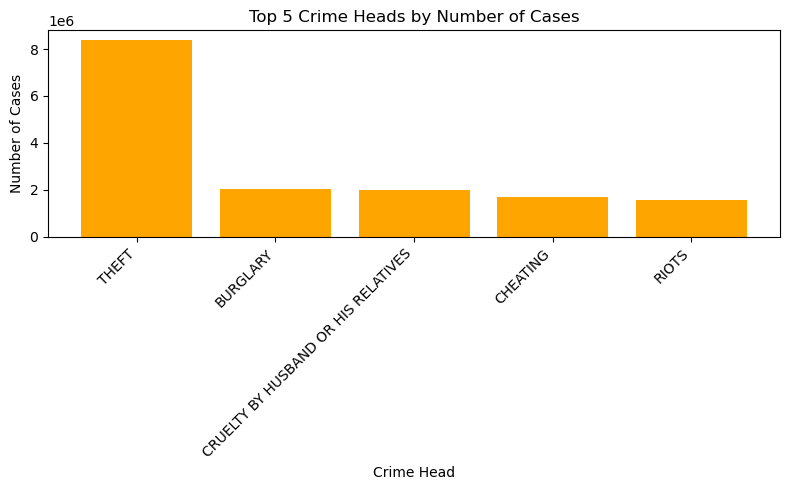

In [370]:
#Grouping by Crime Head and sum number of cases
crime_totals = new_df.groupby("Crime Head")["Number of Cases"].sum().reset_index()

#Sorting for the top 5 crimes
top_5_crimes = crime_totals.sort_values(by="Number of Cases", ascending=False).head(5)

#Plotting the graph
plt.figure(figsize=(8,5))
plt.bar(top_5_crimes["Crime Head"], top_5_crimes["Number of Cases"], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 Crime Heads by Number of Cases")
plt.ylabel("Number of Cases")
plt.xlabel("Crime Head")
plt.tight_layout()
plt.show()

### Finding and plotting the top 5 crime heads for each state by number of Cases

          STATE/UT                           Crime Head  Number of Cases
14   A & N ISLANDS                                THEFT           3359.0
1    A & N ISLANDS                             BURGLARY           1445.0
2    A & N ISLANDS                             CHEATING            843.0
0    A & N ISLANDS                     ASSAULT ON WOMEN            580.0
9    A & N ISLANDS               KIDNAPPING & ABDUCTION            509.0
..             ...                                  ...              ...
539    WEST BENGAL                                THEFT         320968.0
529    WEST BENGAL  CRUELTY BY HUSBAND OR HIS RELATIVES         319229.0
527    WEST BENGAL                             CHEATING          86472.0
537    WEST BENGAL                                RIOTS          82887.0
534    WEST BENGAL               KIDNAPPING & ABDUCTION          67101.0

[180 rows x 3 columns]


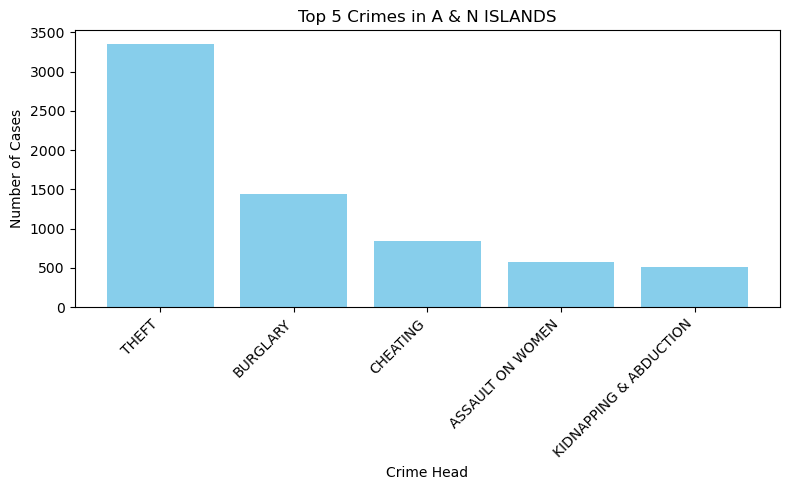

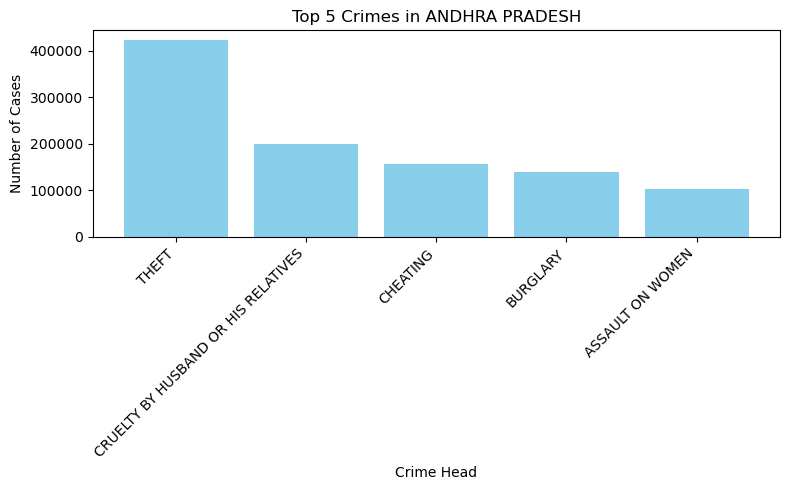

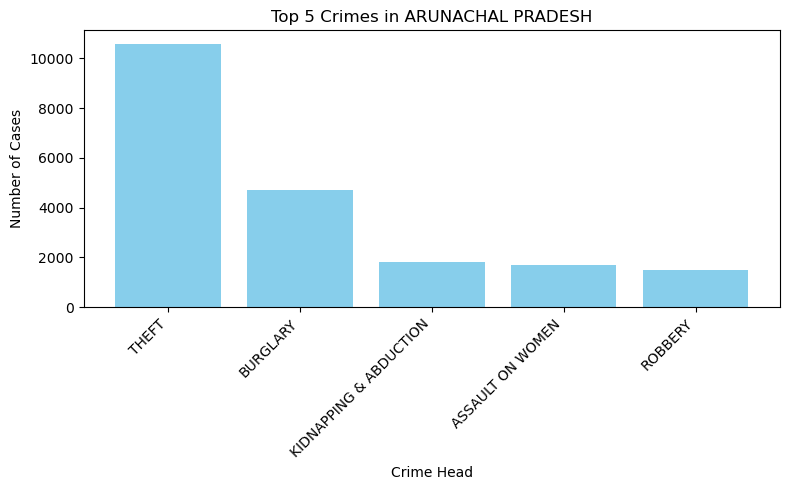

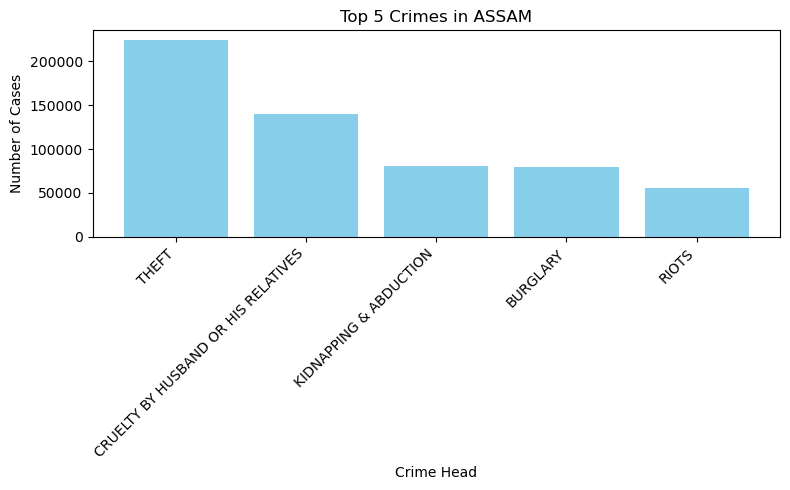

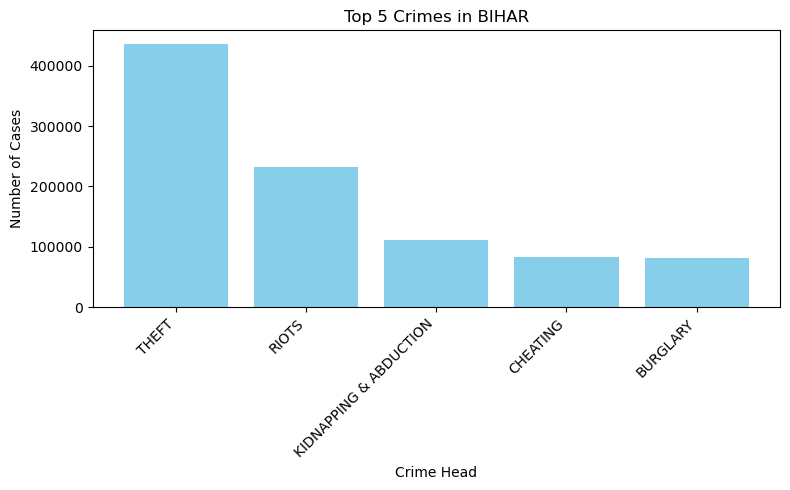

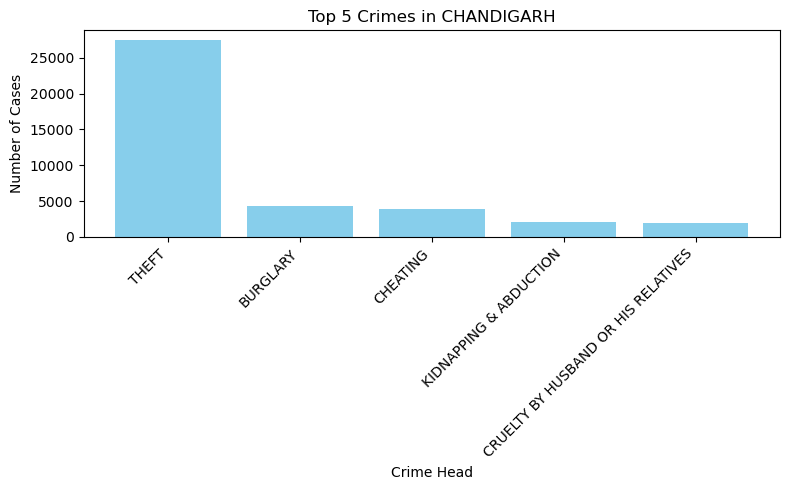

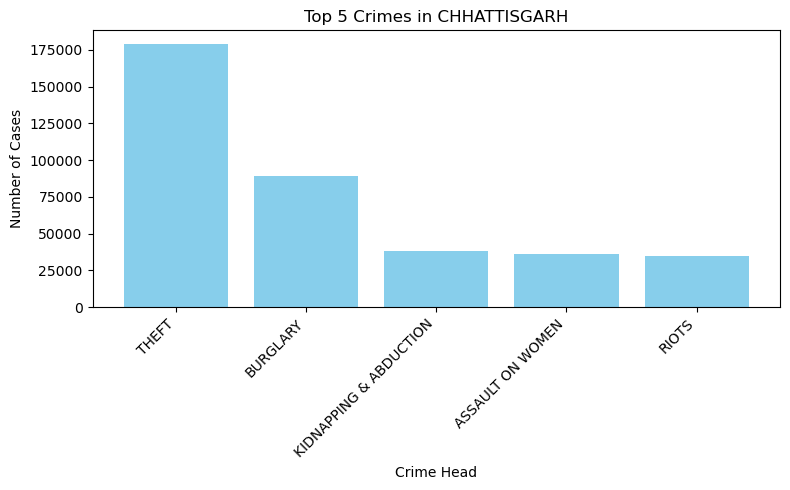

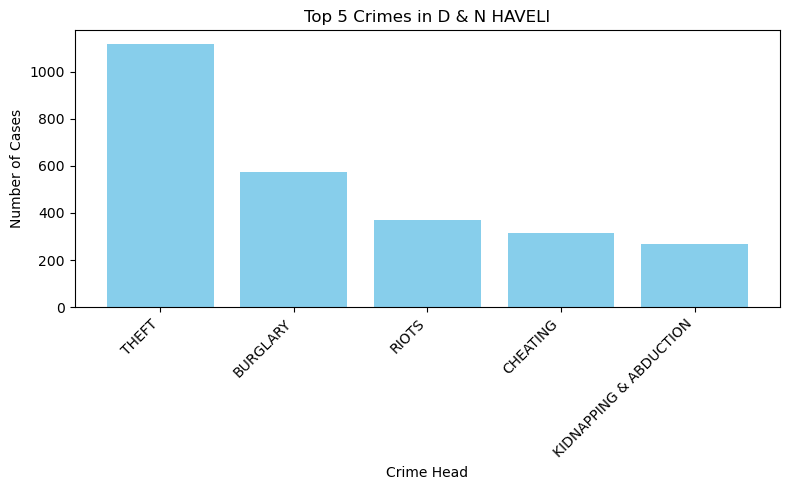

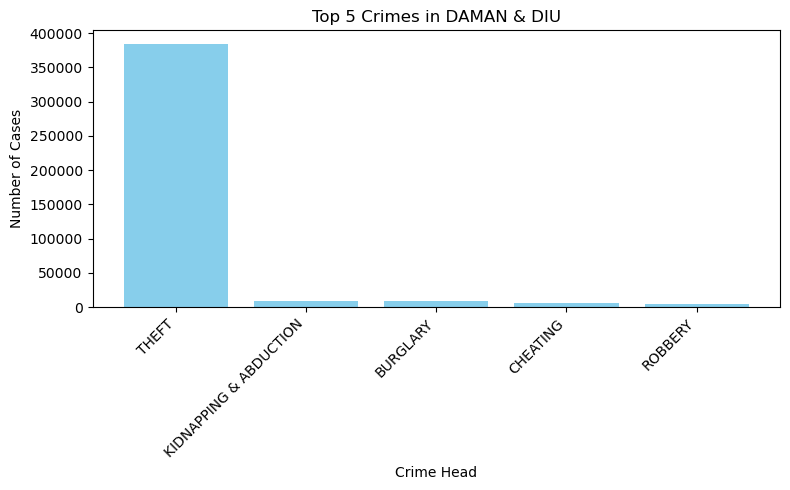

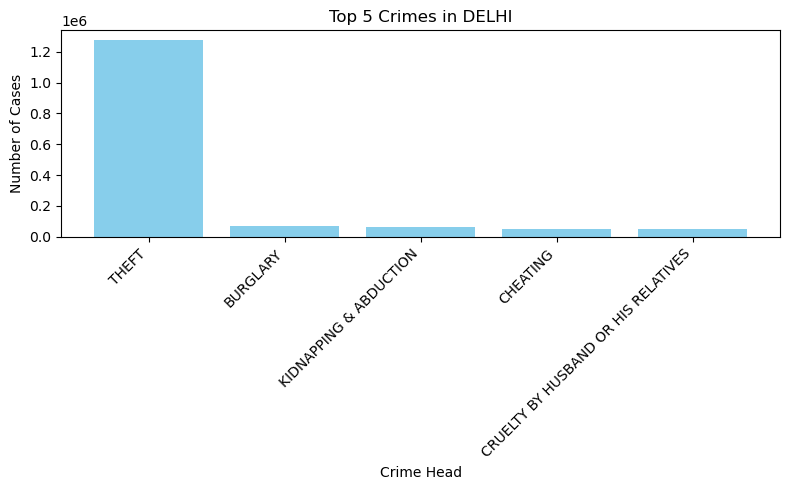

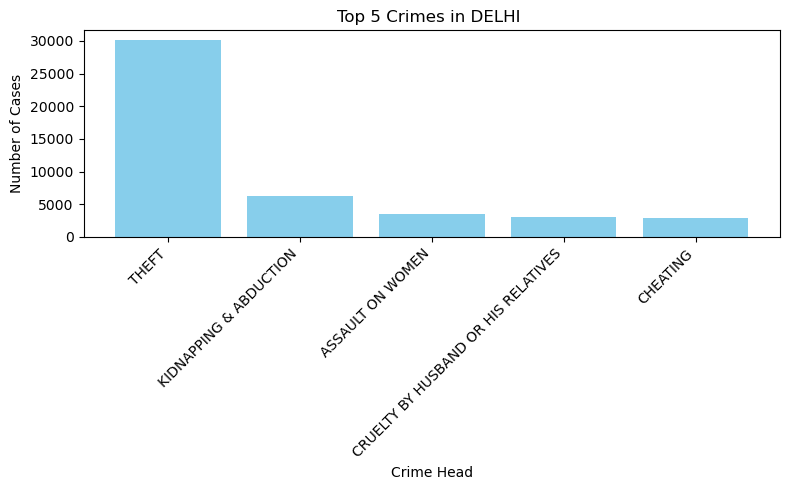

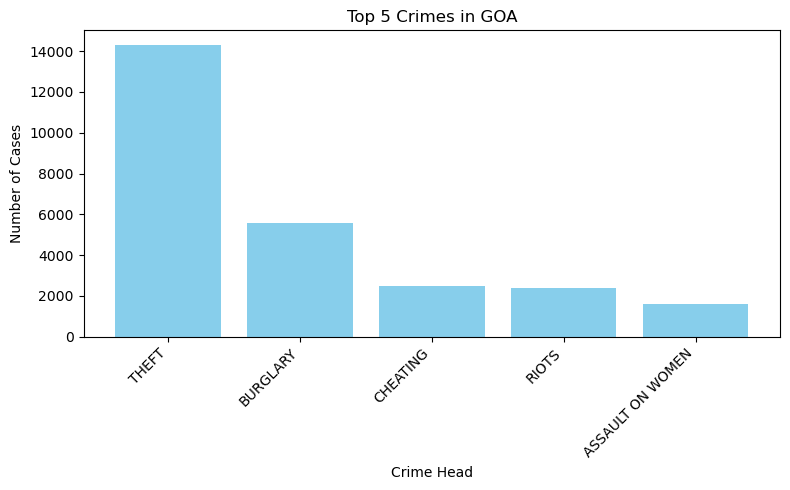

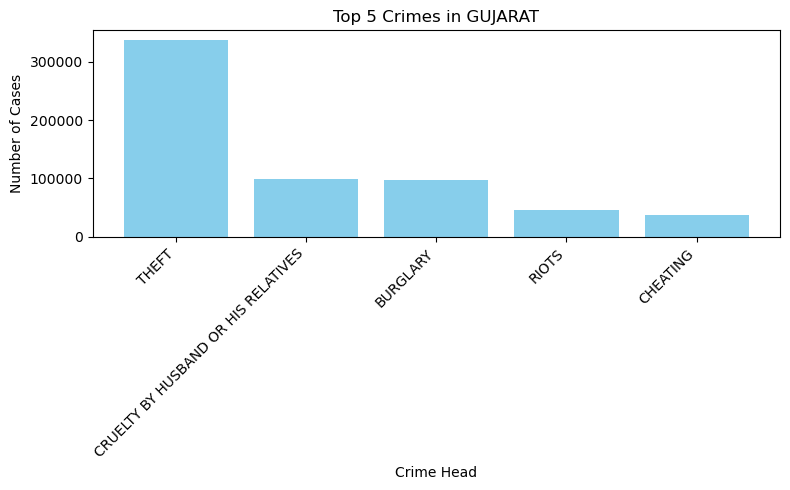

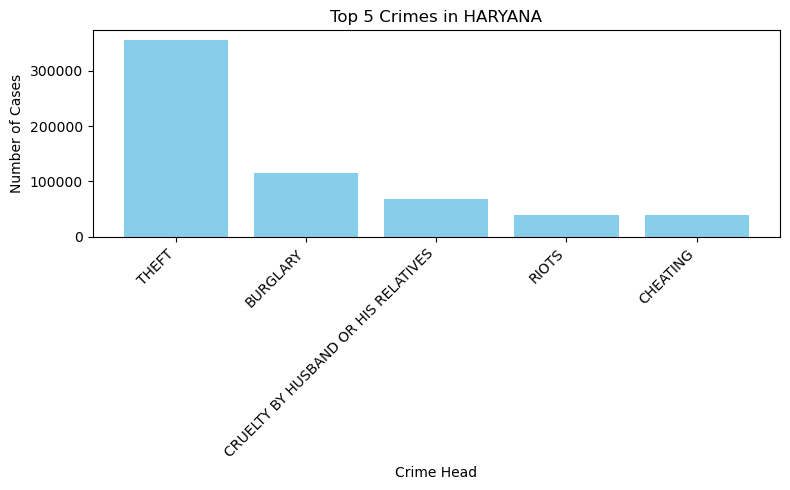

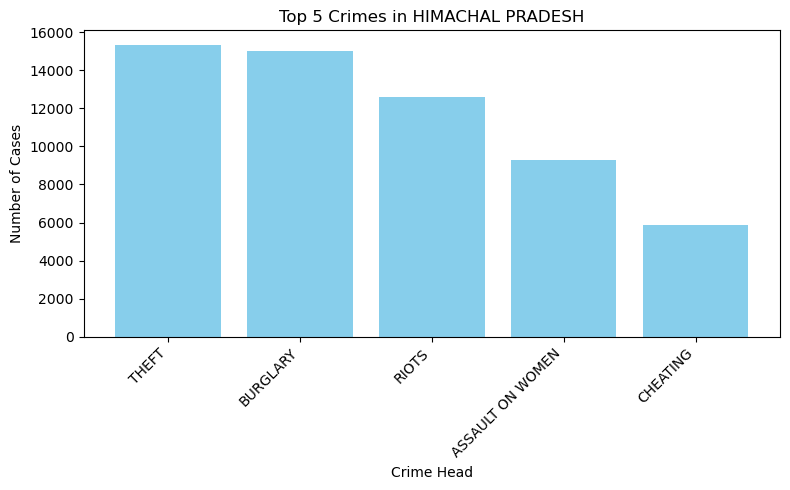

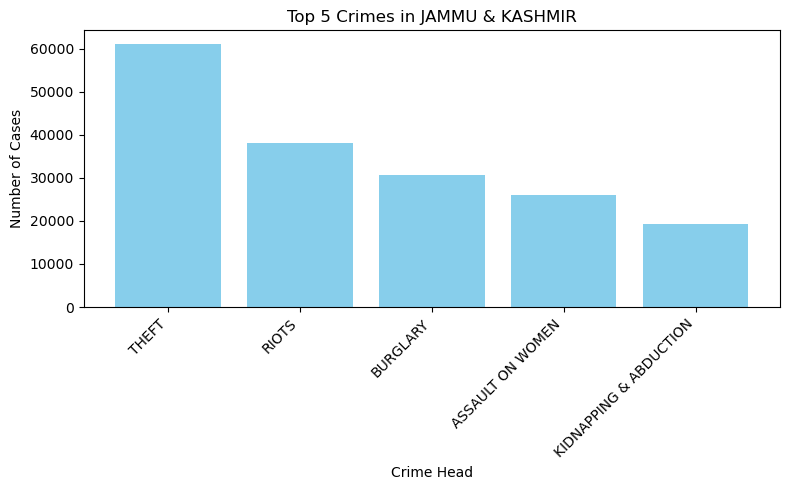

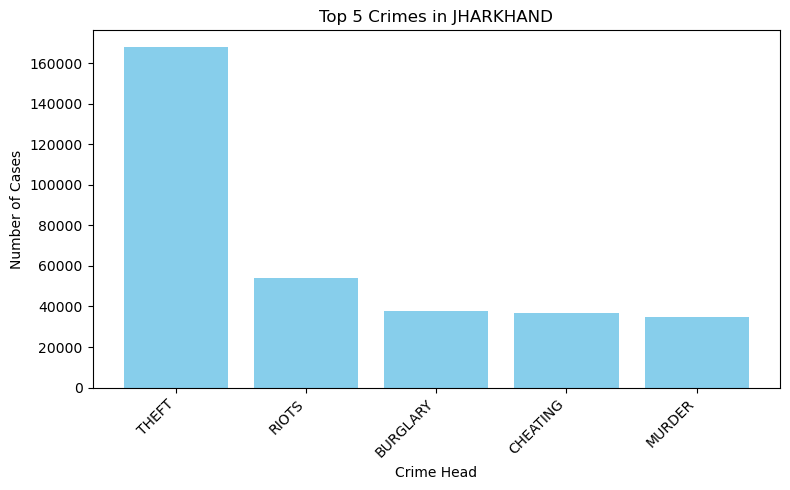

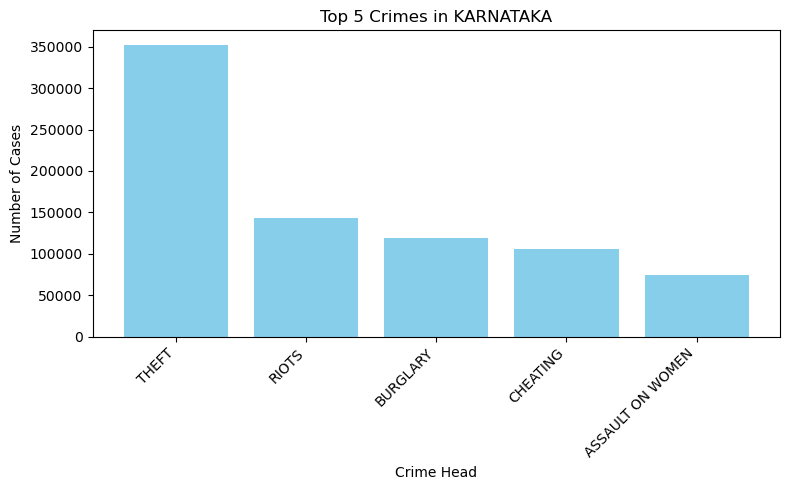

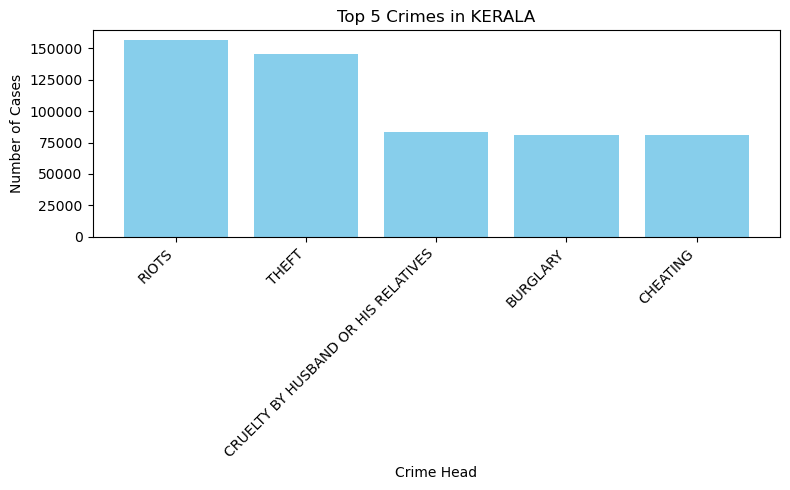

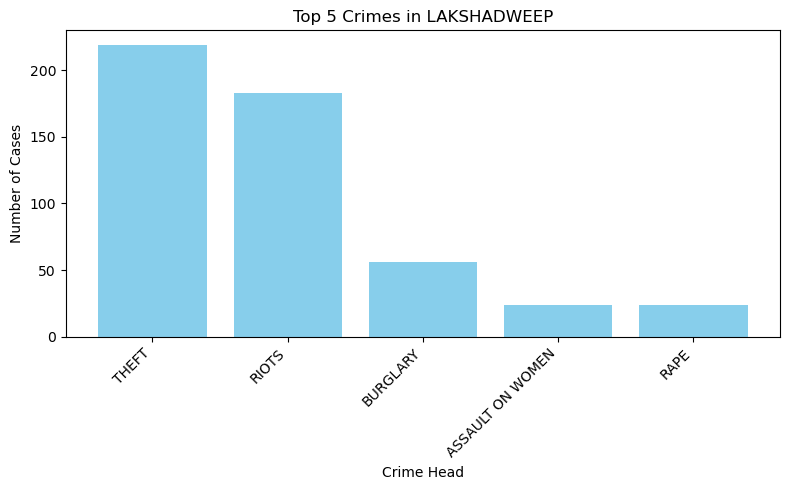

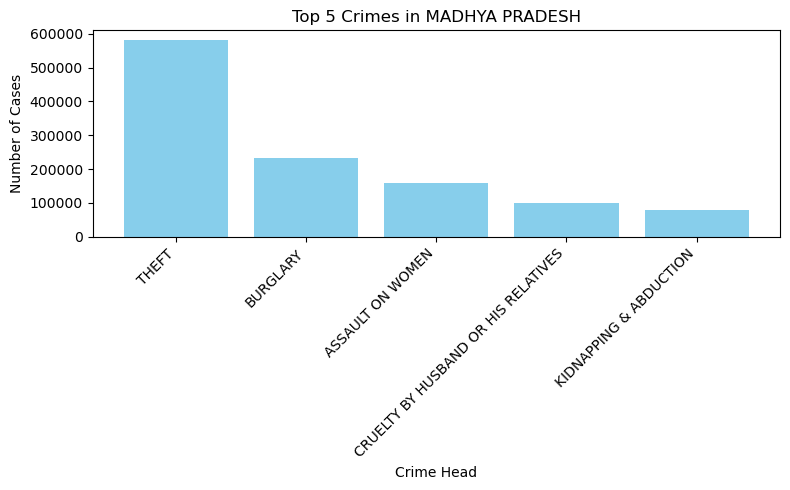

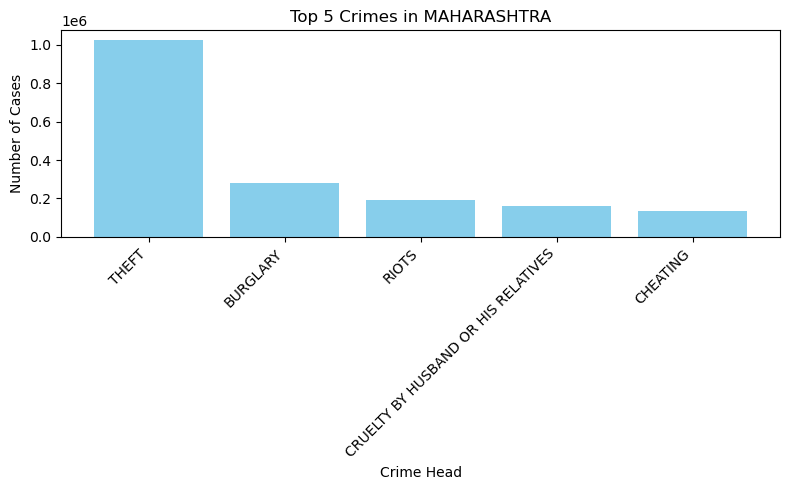

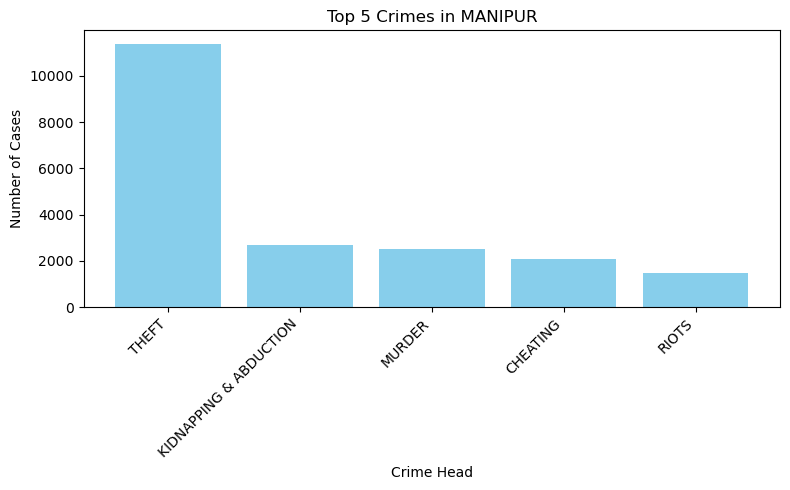

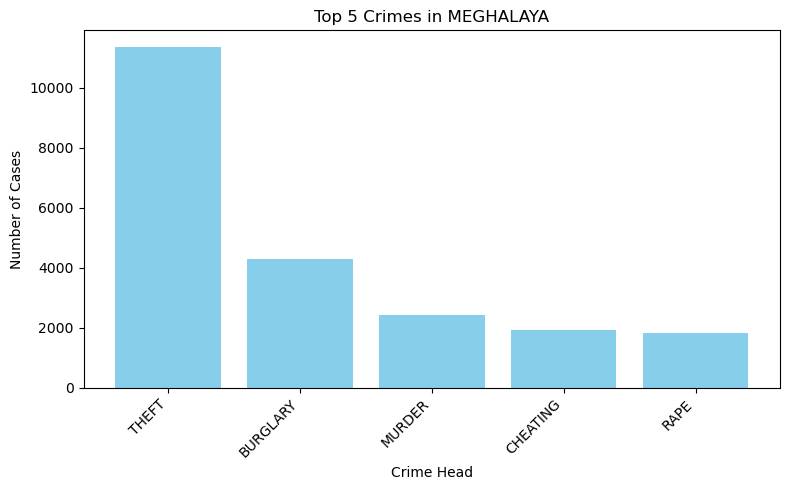

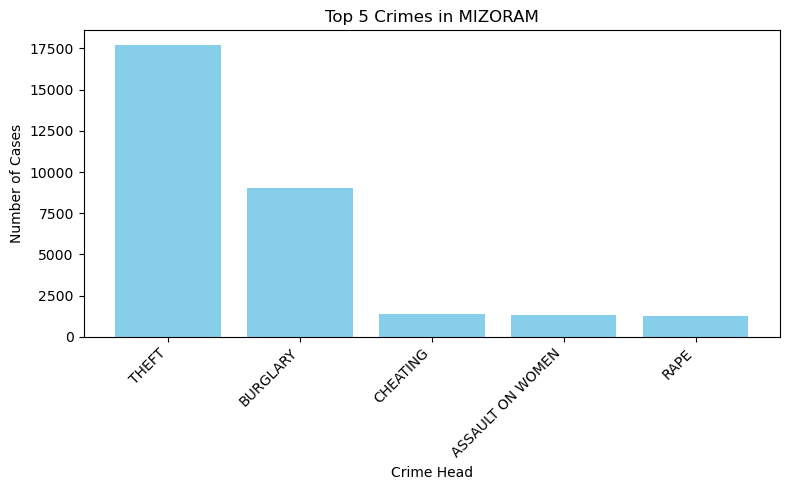

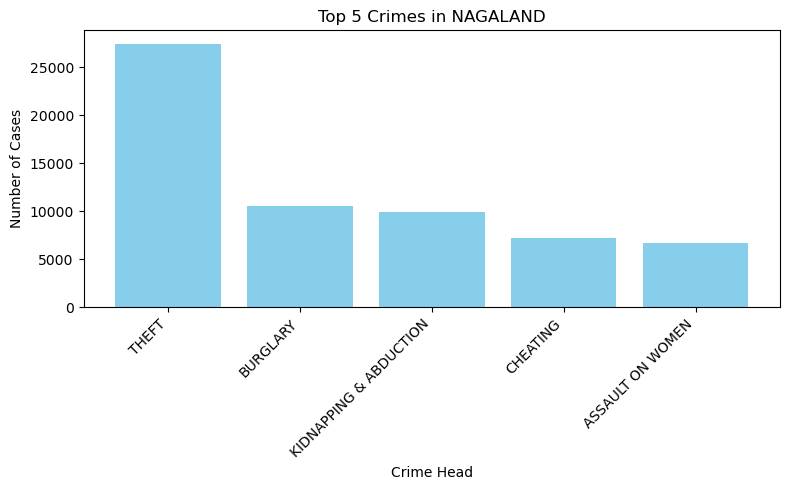

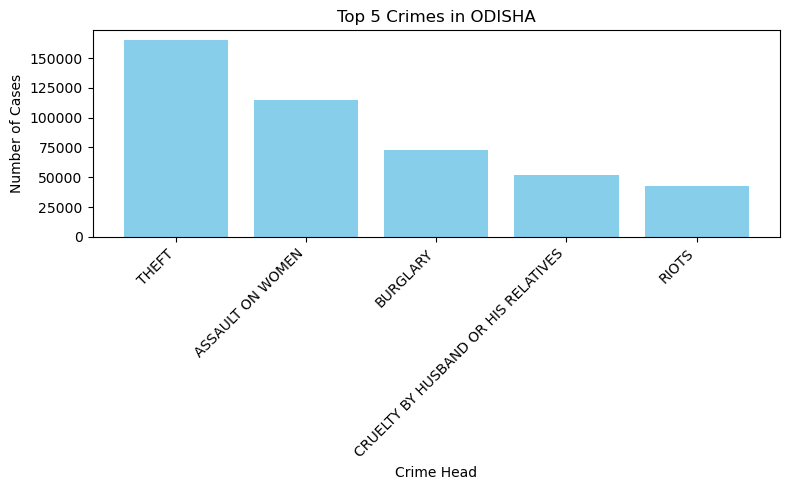

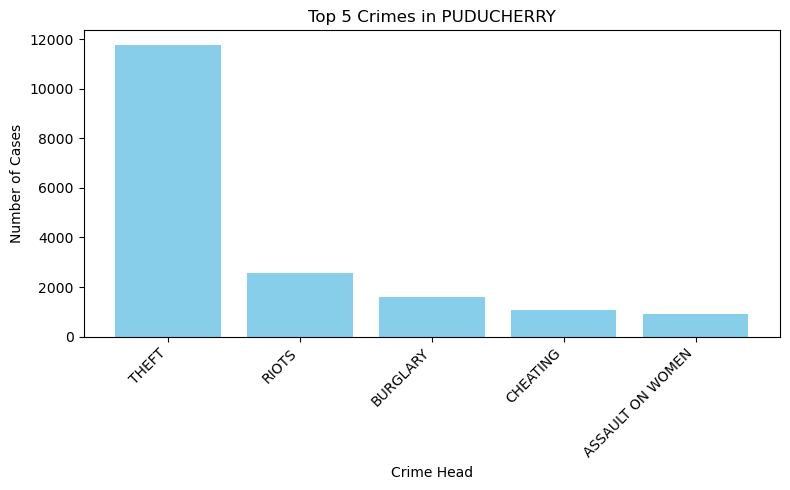

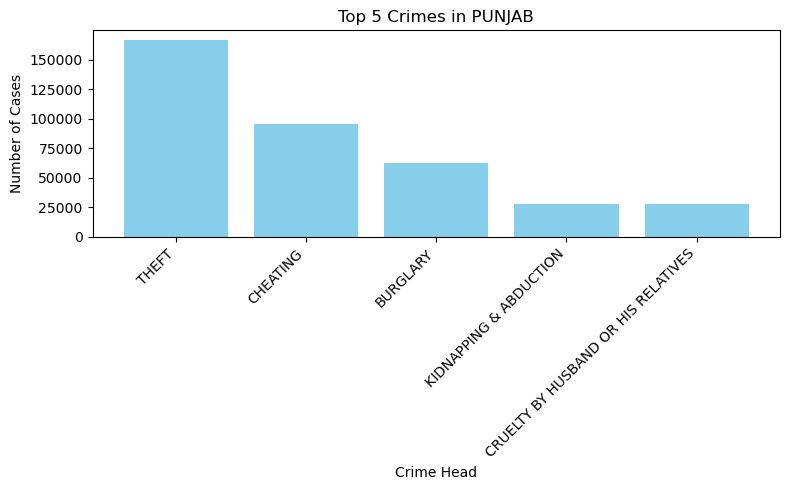

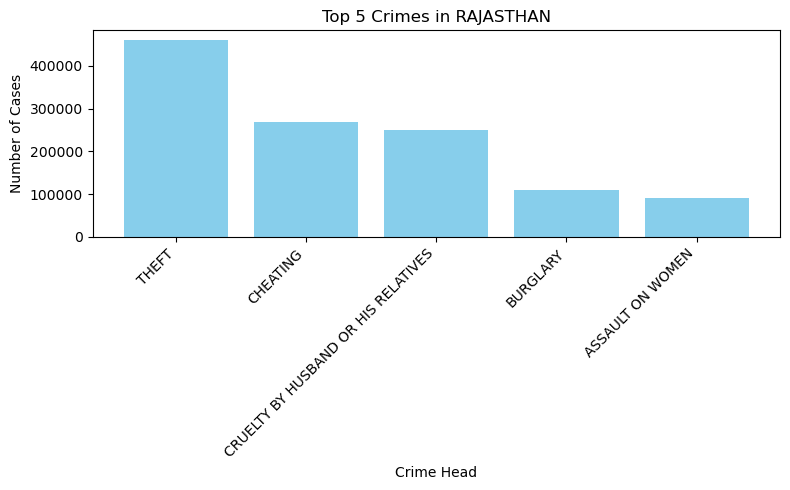

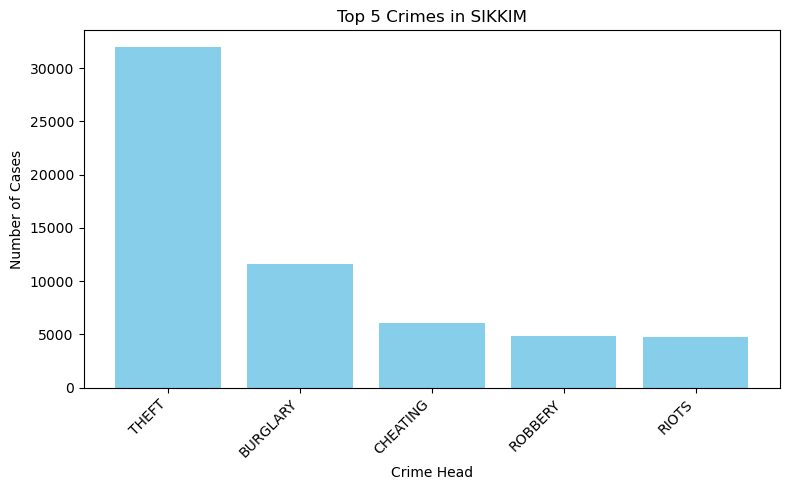

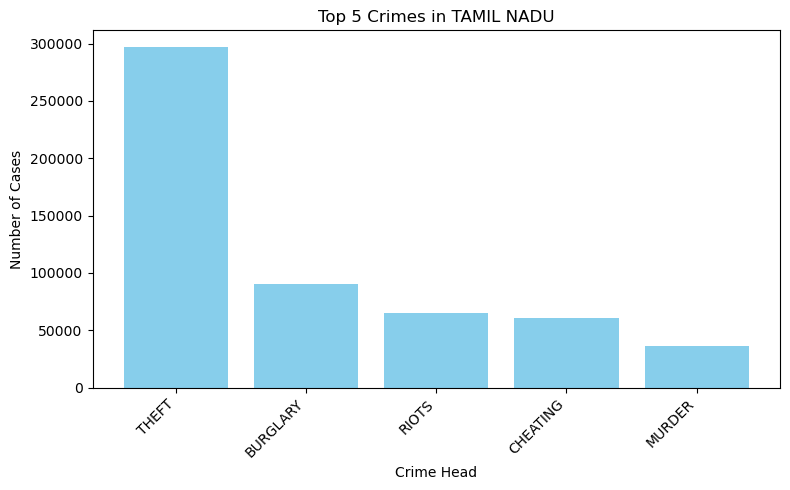

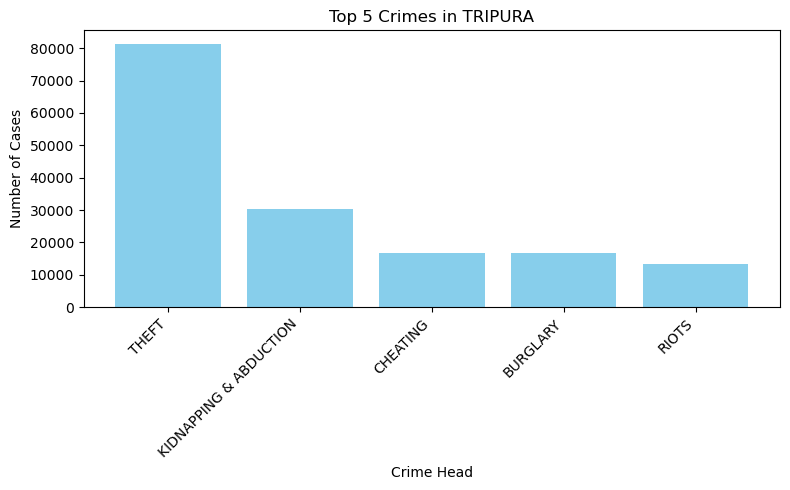

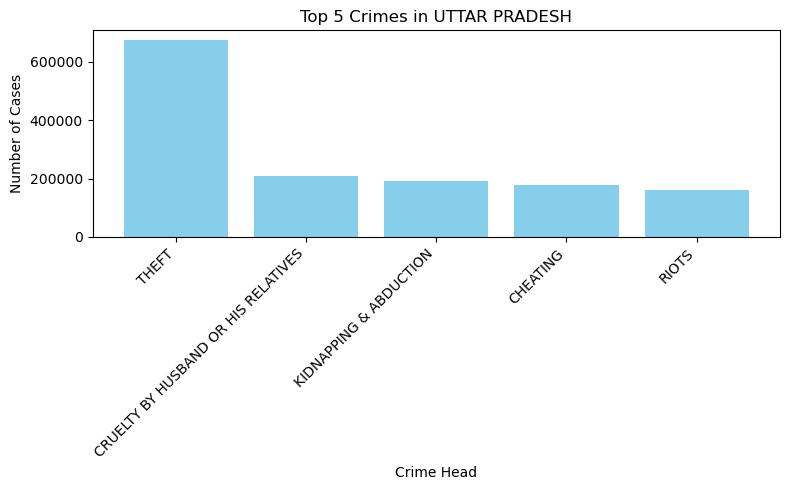

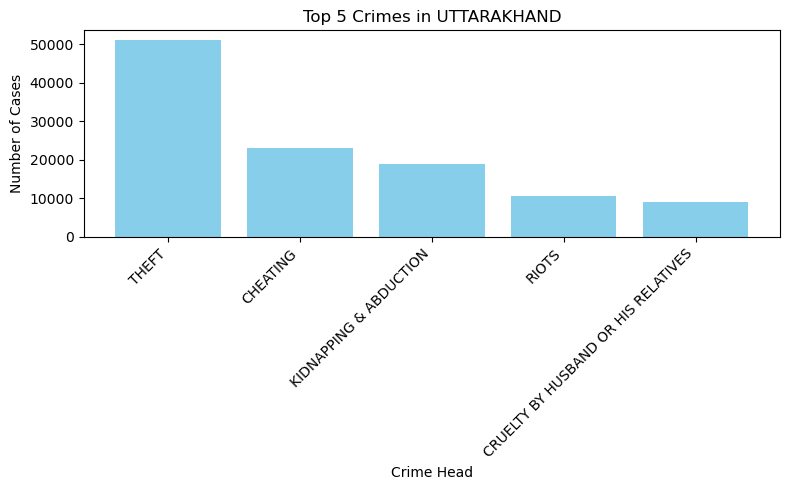

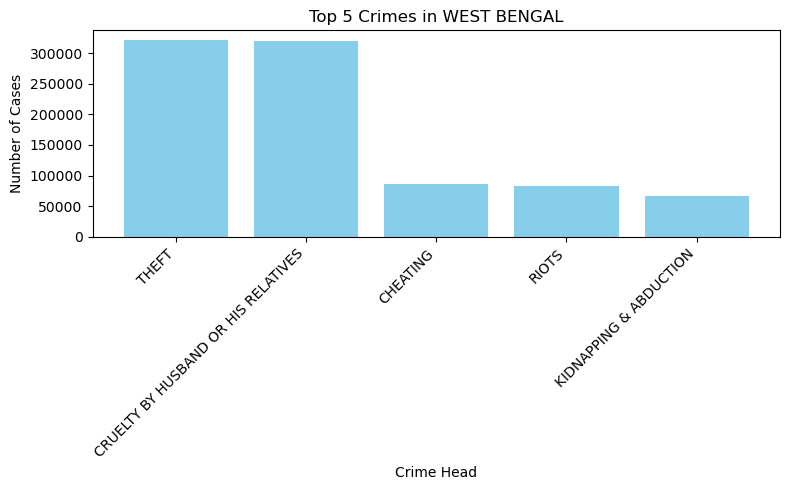

In [375]:
new_df= pd.read_csv('New_Final_Dataset.csv')

#Grouping by STATE/UT and Crime Head
crime_totals = new_df.groupby(["STATE/UT", "Crime Head"])["Number of Cases"].sum().reset_index()

#Finding top 5 crimes for each state
top_crimes_per_state = (
    crime_totals.sort_values(["STATE/UT", "Number of Cases"], ascending=[True, False])
    .groupby("STATE/UT")
    .head(5)
)

print(top_crimes_per_state)

#Ploting the top 5 crimes for each state
for state in top_crimes_per_state["STATE/UT"].unique():
    state_data = top_crimes_per_state[top_crimes_per_state["STATE/UT"] == state]

    plt.figure(figsize=(8,5))
    plt.bar(state_data["Crime Head"], state_data["Number of Cases"], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top 5 Crimes in {state}")
    plt.ylabel("Number of Cases")
    plt.xlabel("Crime Head")
    plt.tight_layout()
    plt.show()

# Label Encoding

### We have two columns in our dataset that has categorical values i.e. STATE/UT and Crime Head
### Thus we need to label encode them

In [72]:
new_df= pd.read_csv('New_Final_Dataset.csv')
new_df

,YEAR,STATE/UT,Number of Cases,Crime Head
0,2001,A & N ISLANDS,13.0,MURDER
1,2002,A & N ISLANDS,17.0,MURDER
2,2003,A & N ISLANDS,21.0,MURDER
3,2004,A & N ISLANDS,15.0,MURDER
4,2005,A & N ISLANDS,14.0,MURDER
...,...,...,...,...
11545,2018,WEST BENGAL,16951.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11546,2019,WEST BENGAL,16951.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11547,2020,WEST BENGAL,19962.0,CRUELTY BY HUSBAND OR HIS RELATIVES
11548,2021,WEST BENGAL,19952.0,CRUELTY BY HUSBAND OR HIS RELATIVES


In [73]:
le = LabelEncoder()

In [74]:
#Mapping the STATE/UT
new_df['STATE/UT'] = le.fit_transform(new_df['STATE/UT'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [63]:
# Saving the mapping file for further use
file = open('New_State_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

A & N ISLANDS - 0

ANDHRA PRADESH - 1

ARUNACHAL PRADESH - 2

ASSAM - 3

BIHAR - 4

CHANDIGARH - 5

CHHATTISGARH - 6

D & N HAVELI - 7

DAMAN & DIU - 8

DELHI - 9

DELHI  - 10

GOA - 11

GUJARAT - 12

HARYANA - 13

HIMACHAL PRADESH - 14

JAMMU & KASHMIR - 15

JHARKHAND - 16

KARNATAKA - 17

KERALA - 18

LAKSHADWEEP - 19

MADHYA PRADESH - 20

MAHARASHTRA - 21

MANIPUR - 22

MEGHALAYA - 23

MIZORAM - 24

NAGALAND - 25

ODISHA - 26

PUDUCHERRY - 27

PUNJAB - 28

RAJASTHAN - 29

SIKKIM - 30

TAMIL NADU - 31

TRIPURA - 32

UTTAR PRADESH - 33

UTTARAKHAND - 34

WEST BENGAL - 35



In [75]:
#Mapping the Crime Head
new_df['Crime Head'] = le.fit_transform(new_df['Crime Head'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [65]:
# Saving the mapping file for further use
file = open('New_CrimeHead_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

ASSAULT ON WOMEN - 0

BURGLARY - 1

CHEATING - 2

CRIMINAL BREACH OF TRUST - 3

CRUELTY BY HUSBAND OR HIS RELATIVES - 4

CULPABLE HOMICIDE - 5

DACOITY - 6

DOWRY DEATHS - 7

INSULT TO MODESTY OF WOMEN - 8

KIDNAPPING & ABDUCTION - 9

MURDER - 10

RAPE - 11

RIOTS - 12

ROBBERY - 13

THEFT - 14



In [76]:
new_df

,YEAR,STATE/UT,Number of Cases,Crime Head
0,2001,0,13.0,10
1,2002,0,17.0,10
2,2003,0,21.0,10
3,2004,0,15.0,10
4,2005,0,14.0,10
...,...,...,...,...
11545,2018,35,16951.0,4
11546,2019,35,16951.0,4
11547,2020,35,19962.0,4
11548,2021,35,19952.0,4


In [79]:
#Interchanging Columns
new_df= new_df[['YEAR','STATE/UT','Crime Head','Number of Cases']]
new_df

,YEAR,STATE/UT,Crime Head,Number of Cases
0,2001,0,10,13.0
1,2002,0,10,17.0
2,2003,0,10,21.0
3,2004,0,10,15.0
4,2005,0,10,14.0
...,...,...,...,...
11545,2018,35,4,16951.0
11546,2019,35,4,16951.0
11547,2020,35,4,19962.0
11548,2021,35,4,19952.0


In [80]:
#Saving the Encoded Dataset into a file
new_df.to_csv("New_Final_Dataset_Encoded.csv", index=False)

### Loadind the Encoded dataset

In [353]:
new_df= pd.read_csv("New_Final_Dataset_Encoded.csv")

In [354]:
new_df

,YEAR,STATE/UT,Crime Head,Number of Cases
0,2001,0,10,13.0
1,2002,0,10,17.0
2,2003,0,10,21.0
3,2004,0,10,15.0
4,2005,0,10,14.0
...,...,...,...,...
11545,2018,35,4,16951.0
11546,2019,35,4,16951.0
11547,2020,35,4,19962.0
11548,2021,35,4,19952.0


In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             11550 non-null  int64  
 1   STATE/UT         11550 non-null  int32  
 2   Crime Head       11550 non-null  int32  
 3   Number of Cases  11550 non-null  float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 270.8 KB


# Splitting of Dataset For training/Testing

In [355]:
x= new_df[new_df.columns[0:3]].values
x

array([[2001,    0,   10],
       [2002,    0,   10],
       [2003,    0,   10],
       ...,
       [2020,   35,    4],
       [2021,   35,    4],
       [2022,   35,    4]], dtype=int64)

In [356]:
y = new_df['Number of Cases'].values
y

array([1.3000e+01, 1.7000e+01, 2.1000e+01, ..., 1.9962e+04, 1.9952e+04,
       1.6800e+04])

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)
x_train

array([[2004,   19,   13],
       [2022,   35,   12],
       [2019,    1,   14],
       ...,
       [2006,    4,   12],
       [2004,    5,    8],
       [2014,    9,   14]], dtype=int64)

In [358]:
y_train

array([0.0000e+00, 6.0000e+00, 1.1301e+04, ..., 8.2590e+03, 1.8000e+01,
       7.8753e+04])

# Model Creation

## 1) Decision Tree Regressor

In [359]:
model1 = tree.DecisionTreeRegressor()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [360]:
print('R2 score:', metrics.r2_score(y_test, y_pred))

R2 score: 0.7395137766168085


## 2)Random Forest Regressor

In [361]:
model2 = RandomForestRegressor(random_state=0)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [362]:
print('R2 score:', metrics.r2_score(y_test, y_pred))

R2 score: 0.7260410333301404


## 3) Neural Networks MLPRegressor

In [ ]:
model3 = MLPRegressor(random_state=0)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [364]:
print('R2 score:', metrics.r2_score(y_test, y_pred))

R2 score: 0.015871373921973464


## 4)Nearest Neighbour

In [365]:
model4 = KNeighborsRegressor(n_neighbors=2)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [366]:
print('R2 score:', metrics.r2_score(y_test, y_pred))

R2 score: 0.32463187090418244


## 5)Support Vector Machine

In [367]:
model5 = svm.SVR()
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)

In [368]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model= LinearRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: 0.015271495680342362


## Conclusion

#### Random Forest Regressor and Decision Tree Regressor are giving better performances in prediction using the StateWise Data present with us

#### The oberved decrease in the performance can be attributed to inconsistencies in the reporting of crime data

#### Even time-series models such as ARIMA, which are robust for structured and stationary datasets, exhibited extremely poor performance on this dataset. 
#### This suggests that inconsistencies in data reporting and non-stationary patterns over time have introduced noise and irregularity beyond what even ARIMA could effectively model.

# Crime Rate Analysis and Prediction in Indian Cities

## About Dataset

#### Since the Statewise dataset showed a lot of irregularties and inconsistencies which we were very likely due to poor reporting of data, a change in the Dataset was absolutely necessary

#### In this study, the data has been collected from the National Crime Records Bureau (NCRB), India.
#### The data provides statistics on the number of crimes commited in 19 metropolitan cities during the year 2014 to 2021.
#### It contains the records of the 10 different category of crimes commited namely:
#### *  Murder                               
#### *  Kidnapping                   
#### *  Crime against women                  
#### *  Crime against children       
#### *  Crime Committed by Juveniles         
#### *  Crime against Senior Citizen 
#### *  Crime against SC                     
#### *  Crime against ST             
#### *  Economic Offences                    
#### *  Cyber Crimes   

#### The 19 metropolitan cities are:
#### *  Ahmedabad        
#### *  Bengaluru        
#### *  Chennai   
#### *  Coimbatore       
#### *  Delhi            
#### *  Ghaziabad 
#### *  Hyderabad        
#### *  Indore           
#### *  Jaipur    
#### *  Kanpur           
#### *  Kochi            
#### *  Kolkata   
#### *  Kozhikode        
#### *  Lucknow          
#### *  Mumbai    
#### *  Nagpur           
#### *  Patna            
#### *  Pune      
#### *  Surat                                             

## Loading the Dataset

In [376]:
df= pd.read_excel("City_Dataset.xlsx", sheet_name="Sheet1")
df

,Year,City,Population (in Lakhs) (2011)+,Murder,Kidnapping,Crime against women,Crime against children,Crime Committed by Juveniles,Crime against Senior Citizen,Crime against SC,Crime against ST,Economic Offences,Cyber Crimes
0,2014,Ahmedabad,63.5,82,367,1371,437,215,68,66,6,399,32
1,2015,Ahmedabad,63.5,94,332,1067,609,157,17,60,9,378,28
2,2016,Ahmedabad,63.5,103,376,1126,481,258,362,96,10,479,77
3,2017,Ahmedabad,63.5,90,263,1405,600,405,534,119,6,608,112
4,2018,Ahmedabad,63.5,98,277,1416,733,352,733,145,9,842,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2017,Surat,45.8,89,332,559,526,436,131,32,10,719,105
148,2018,Surat,45.8,108,373,712,1075,409,161,29,13,829,155
149,2019,Surat,45.8,97,358,1015,770,516,232,34,19,804,228
150,2020,Surat,45.8,116,163,633,419,298,69,20,12,401,204


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           152 non-null    int64  
 1   City                           152 non-null    object 
 2   Population (in Lakhs) (2011)+  152 non-null    float64
 3   Murder                         152 non-null    int64  
 4   Kidnapping                     152 non-null    int64  
 5   Crime against women            152 non-null    int64  
 6   Crime against children         152 non-null    int64  
 7   Crime Committed by Juveniles   152 non-null    int64  
 8   Crime against Senior Citizen   152 non-null    int64  
 9   Crime against SC               152 non-null    int64  
 10  Crime against ST               152 non-null    int64  
 11  Economic Offences              152 non-null    int64  
 12  Cyber Crimes                   152 non-null    int

## Visualization of Data

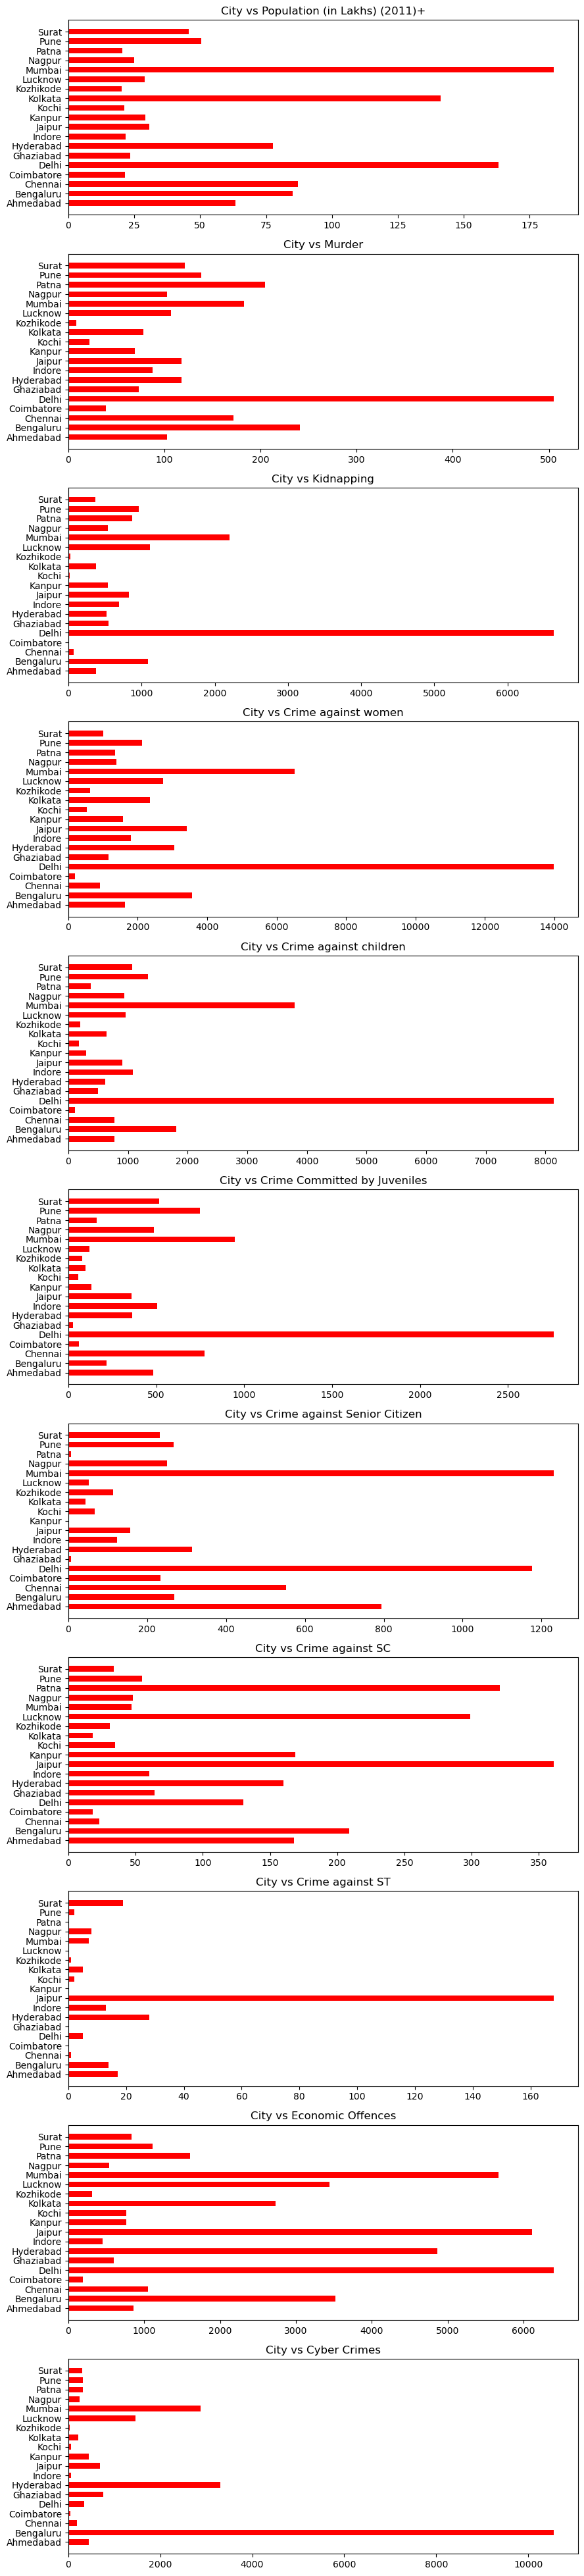

In [378]:
fig, ax = plt.subplots(11, 1, figsize=(10, 50))

for i in range(0, 11):
    ax[i].barh(df['City'], df[df.columns[i+2]], 0.6, color='Red')
    ax[i].set_title('City vs ' + df.columns[i+2])
plt.show()

## Conversion of the Dataset into appropriate format

In [246]:
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Crime Head'])
for i in range(3, 13):
    temp_df = df[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp_df['Number Of Cases'] = df[[df.columns[i]]]
    temp_df['Crime Head'] = df.columns[i]
    
    new_df = pd.concat([new_df, temp_df])

C:\Users\Arya\AppData\Local\Temp\ipykernel_18520\2077998190.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, temp_df])


In [247]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Crime Head
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes
148,2018,Surat,45.8,155,Cyber Crimes
149,2019,Surat,45.8,228,Cyber Crimes
150,2020,Surat,45.8,204,Cyber Crimes


## Now Calculating Crime Rate

#### The Crime Rate here is to be calculated for each city and for each corresponding crime head in a city

#### Crime Rate= Total Crime Cases/ Population (in Lakhs)

In [250]:
new_df['Crime Rate']= new_df['Number Of Cases']/new_df['Population (in Lakhs) (2011)+']
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Crime Head,Crime Rate
0,2014,Ahmedabad,63.5,82,Murder,1.291339
1,2015,Ahmedabad,63.5,94,Murder,1.480315
2,2016,Ahmedabad,63.5,103,Murder,1.622047
3,2017,Ahmedabad,63.5,90,Murder,1.417323
4,2018,Ahmedabad,63.5,98,Murder,1.543307
...,...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes,2.292576
148,2018,Surat,45.8,155,Cyber Crimes,3.384279
149,2019,Surat,45.8,228,Cyber Crimes,4.978166
150,2020,Surat,45.8,204,Cyber Crimes,4.454148


In [252]:
#Deleting the number of Cases Column
new_df= new_df.drop(['Number Of Cases'],axis=1)
new_df

,Year,City,Population (in Lakhs) (2011)+,Crime Head,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
147,2017,Surat,45.8,Cyber Crimes,2.292576
148,2018,Surat,45.8,Cyber Crimes,3.384279
149,2019,Surat,45.8,Cyber Crimes,4.978166
150,2020,Surat,45.8,Cyber Crimes,4.454148


In [253]:
#Saving this dataframe into a new file
new_df.to_excel("New_City_Dataset.xlsx", index=False, sheet_name='Sheet1')

In [379]:
dataset= pd.read_excel("New_City_Dataset.xlsx", sheet_name= "Sheet1")
dataset

,Year,City,Population (in Lakhs) (2011)+,Crime Head,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
1515,2017,Surat,45.8,Cyber Crimes,2.292576
1516,2018,Surat,45.8,Cyber Crimes,3.384279
1517,2019,Surat,45.8,Cyber Crimes,4.978166
1518,2020,Surat,45.8,Cyber Crimes,4.454148


In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Crime Head                     1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.5+ KB


### This Dataset doesnot have any NULL values
### Hence we proceed further

## Visualisation using this Dataset

### The goal is to find and plot top 5 crime heads with maximum crime rate in the whole dataset

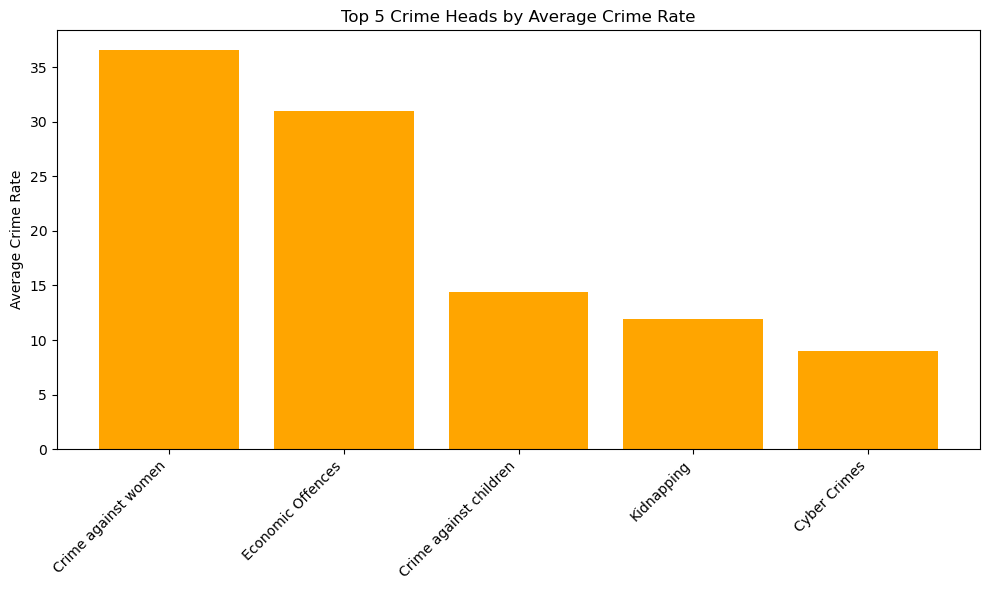

In [380]:
# Grouping by Crime Head and get the average Crime Rate across all cities & years
crime_totals = dataset.groupby("Crime Head")["Crime Rate"].mean().reset_index()

# Sorting by Crime Rate in descending order
crime_totals = crime_totals.sort_values(by="Crime Rate", ascending=False)

#Finding and storing the top 5 crime heads
top5_crimes = crime_totals.head(5)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(top5_crimes["Crime Head"], top5_crimes["Crime Rate"], color='orange')
plt.title("Top 5 Crime Heads by Average Crime Rate")
plt.ylabel("Average Crime Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### A Pie Chart to showcase the proportion of the top 5 crime heads to understand their distribution better

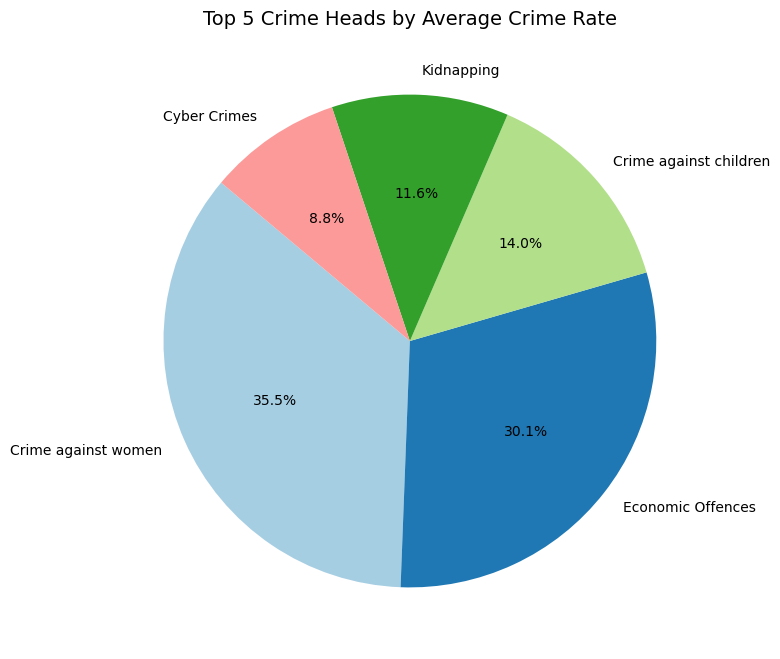

In [384]:
plt.figure(figsize=(8, 8))
plt.pie(
    top5_crimes["Crime Rate"],
    labels=top5_crimes["Crime Head"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Crime Heads by Average Crime Rate", fontsize=14)
plt.show()

## Label Encoding in the New_City_Dataset

#### The two categorical columns are City and Crime Head

In [256]:
le= LabelEncoder()

In [257]:
#Label Encoding of the column City in the Dataset
dataset['City'] = le.fit_transform(dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [258]:
# Saving the mapping file
file = open('City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [259]:
#Label Encoding of the column Crime Head in the Dataset
dataset['Crime Head'] = le.fit_transform(dataset['Crime Head'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [260]:
# Saving the mapping file
file = open('City_CrimeHead_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Committed by Juveniles - 0

Crime against SC - 1

Crime against ST - 2

Crime against Senior Citizen - 3

Crime against children - 4

Crime against women - 5

Cyber Crimes - 6

Economic Offences - 7

Kidnapping - 8

Murder - 9



In [263]:
dataset

,Year,City,Population (in Lakhs) (2011)+,Crime Head,Crime Rate
0,2014,0,63.5,9,1.291339
1,2015,0,63.5,9,1.480315
2,2016,0,63.5,9,1.622047
3,2017,0,63.5,9,1.417323
4,2018,0,63.5,9,1.543307
...,...,...,...,...,...
1515,2017,18,45.8,6,2.292576
1516,2018,18,45.8,6,3.384279
1517,2019,18,45.8,6,4.978166
1518,2020,18,45.8,6,4.454148


In [264]:
#Saving this encoded result in an excel file
dataset.to_excel("City_Dataset_Encoded.xlsx", index=False, sheet_name="Sheet1")

## Loading the Dataset

In [3]:
new_dataset= pd.read_excel("City_Dataset_Encoded.xlsx", sheet_name="Sheet1")
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Crime Head,Crime Rate
0,2014,0,63.5,9,1.291339
1,2015,0,63.5,9,1.480315
2,2016,0,63.5,9,1.622047
3,2017,0,63.5,9,1.417323
4,2018,0,63.5,9,1.543307
...,...,...,...,...,...
1515,2017,18,45.8,6,2.292576
1516,2018,18,45.8,6,3.384279
1517,2019,18,45.8,6,4.978166
1518,2020,18,45.8,6,4.454148


## Dataset Splitting for Training and Testing

In [4]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2014. ,    0. ,   63.5,    9. ],
       [2015. ,    0. ,   63.5,    9. ],
       [2016. ,    0. ,   63.5,    9. ],
       ...,
       [2019. ,   18. ,   45.8,    6. ],
       [2020. ,   18. ,   45.8,    6. ],
       [2021. ,   18. ,   45.8,    6. ]])

In [5]:
y = new_dataset['Crime Rate'].values
y

array([1.29133858, 1.48031496, 1.62204724, ..., 4.97816594, 4.45414847,
       6.4628821 ])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [7]:
x_train

array([[2.018e+03, 8.000e+00, 3.070e+01, 1.000e+00],
       [2.015e+03, 1.200e+01, 2.030e+01, 3.000e+00],
       [2.014e+03, 5.000e+00, 2.360e+01, 6.000e+00],
       ...,
       [2.015e+03, 1.200e+01, 2.030e+01, 7.000e+00],
       [2.019e+03, 1.300e+01, 2.900e+01, 9.000e+00],
       [2.014e+03, 1.700e+01, 5.050e+01, 6.000e+00]])

In [8]:
y_train

array([ 5.86319218,  0.98522167,  2.58474576, ..., 12.95566502,
        2.5862069 ,  2.77227723])

## Building Models

### 1) Random Forest Regressor

In [273]:
model1 = RandomForestRegressor(random_state=0)
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [274]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.487973049950136
Mean Squared Error: 21.362971441526998
R2 score: 0.9322626088672231


### 2) Decision Tree Regressor

In [275]:
model2 = tree.DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [276]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.8909777066258
Mean Squared Error: 34.966165434179764
R2 score: 0.8891298043012729


### 3) Nearest Neighbour

In [16]:
from sklearn import metrics

model3 = KNeighborsRegressor(n_neighbors=2)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6.846579820991532
Mean Squared Error: 150.44504177108698
R2 score: 0.5229711060407313


#### Conclusion: Both Random Forest Regressor and Decision Tree Regressor performed significantly well for CityWise Crime Dataset compared to the StateWise Crime Dataset